# BlueBerry Winery - Data Analytics

In [349]:
#Load all needed libraries

import numpy as np 
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline



#Data Acquisition

In [350]:
#Load the data for red wine via CSV file
#Read a CSV file with semicolon as the delimiter

red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

display(red_wine)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [351]:
#Load the data for white wine via CSV file
#Read a CSV file with semicolon as the delimiter

white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

display(white_wine)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


#Data Wrangeling

In [352]:
#Data inspection: Check the format, column names and data type. 
red_wine.head(10)



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [353]:
#Data inspection: Check if the data set has been completely imported, and to see the values of the last few rows.

red_wine.tail(10)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [354]:

white_wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [355]:

white_wine.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4888,6.8,0.220,0.36,1.20,0.052,38.0,127.0,0.99330,3.04,0.54,9.2,5
4889,4.9,0.235,0.27,11.75,0.030,34.0,118.0,0.99540,3.07,0.50,9.4,6
4890,6.1,0.340,0.29,2.20,0.036,25.0,100.0,0.98938,3.06,0.44,11.8,6
4891,5.7,0.210,0.32,0.90,0.038,38.0,121.0,0.99074,3.24,0.46,10.6,6
4892,6.5,0.230,0.38,1.30,0.032,29.0,112.0,0.99298,3.29,0.54,9.7,5
4893,6.2,0.210,0.29,1.60,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.320,0.36,8.00,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.240,0.19,1.20,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.290,0.30,1.10,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.210,0.38,0.80,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [356]:
#Let's find the total number of rows and columns in the data set using “.shape”

red_wine.shape


(1599, 12)

#The data set contains 1599 observations, each with 12 different attributes or variables, out of which one is dependent variable and rest 11 are independent variables — physico-chemical characteristics. The rows correspond to individual samples or observations, and the columns represent the different variables or features measured for each sample.

#Integer variable: The integer variable is "quality" 
#Numeric variables: The remaining 11 numeric variables

In [357]:

white_wine.shape

(4898, 12)

#The dataset contains 4898 observations, each with 12 different attributes or variables, out of which one is dependent variable and rest 11 are independent variables — physico-chemical characteristics. The rows correspond to individual samples or observations, and the columns represent the different variables or features measured for each sample.

#Integer variable: The integer variable is "quality" 
#Numeric variables: The remaining 11 numeric variables

In [358]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


#Data has only float and integer values.

In [359]:
#let's look at the structure and characteristics of both ref and white wine data.

red_wine.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#Data has only float and integer values.

In [360]:
# count missing values for red_wine dataset
missing_values_count = red_wine.isnull().sum()

print(missing_values_count)

total_missing = missing_values_count.sum()

print(f'Total missing values: {total_missing}')

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Total missing values: 0


#No missing values.

In [361]:
# count missing values in each column for white_wine dataset

missing_values_count = white_wine.isnull().sum()

print(missing_values_count)

total_missing = missing_values_count.sum()

print(f'Total missing values: {total_missing}')

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Total missing values: 0


#No missing values.

In [362]:
#The describe() function in pandas is very handy in getting various summary statistics.
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#Here we can notice mean value is less than median value of each column which is represented by 50% in the index column.
#There is notably a large difference between 75th %tile and max values of the variables “residual sugar”,”free sulfur dioxide” and ”total sulfur dioxide”.
#These observations suggest that there are extreme values-Outliers in our data set.

In [363]:
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


#Here we can notice mean value is less than median value of each column which is represented by 50% in the index column.
#There is notably a large difference between 75th %tile and max values of the variables “residual sugar”,”free sulfur dioxide” and ”total sulfur dioxide”.
#These observations suggest that there are extreme values-Outliers in our data set.

In [364]:
#Understand the distribution and range of values that are present in the "quality" column.

white_wine.quality.unique()
sorted(white_wine.quality.unique())

[3, 4, 5, 6, 7, 8, 9]

#Target variable/Dependent variable is discrete and categorical in nature.

#“Quality” score scale ranges from 1 to 10, where 1 being poor and 10 being the best.

#1,2 & 10 quality ratings are not given by any observation. The only scores obtained are between 3 to 9.

In [365]:
red_wine.quality.unique()
sorted(red_wine.quality.unique())

[3, 4, 5, 6, 7, 8]

#Target variable/Dependent variable is discrete and categorical in nature.

#“Quality” score scale ranges from 1 to 10, where 1 being poor and 10 being the best.

#1,2,9 & 10 quality ratings are not given by any observation. The only scores obtained are between 3 to 8.

In [366]:
white_wine.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

#This tells us vote count of each quality score in descending order.

#“quality” has most values concentrated in the categories 5, 6 and 7.

#Only a few observations made for the categories 3 & 9.

In [367]:
red_wine.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

#This tells us vote count of each quality score in descending order.

#“quality” has most values concentrated in the categories 5, 6 and 7.

#Only a few observations made for the categories 3 & 8.

# Exploratory Analysis

In [394]:
# we are creating a new column called "quality_label", we define a range and associate that range with a label
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')


# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
categories=['low', 'medium', 'high'])

red_wine


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,low
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,low
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,medium
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,low
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,medium
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,medium
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,low


In [396]:
# we are creating a new column called "quality_label", we define a range and associate that range with a label
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')


# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'],
categories=['low', 'medium', 'high'])

white_wine


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,medium
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,low
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,medium
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,medium


In [399]:

# Combine the datasets into a single dataframe
df_wine = pd.concat([white_wine.assign(wine_type='white'), 
                     red_wine.assign(wine_type='red')], ignore_index=True)

# Define the quality labels
quality_labels = ['Low', 'Medium', 'High']

# Categorize the quality values into labels
df_wine['quality_label'] = pd.Categorical(df_wine['quality'].apply(lambda x: quality_labels[int(x//4)]))

df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,Medium,white
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,Medium,white
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,Medium,white
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,Medium,white
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,Medium,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Medium,red
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,Medium,red
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Medium,red
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,Medium,red



#The residual sugar, chlorides, and sulphates are very skewed.

#High skewness means a distribution curve has a shorter tail on one end a distribution curve and a long tail on the other. The data set follows a normal distribution curve; however, higher skewed data means the data is not evenly distributed.


In [398]:

pd.concat([red_wine.describe(), white_wine.describe()], axis=0, keys=["Red Wines Stats", "White Wines Stats"])


fixed acidity  volatile acidity  citric acid  \
Red Wines Stats   count    1599.000000       1599.000000  1599.000000   
                  mean        8.319637          0.527821     0.270976   
                  std         1.741096          0.179060     0.194801   
                  min         4.600000          0.120000     0.000000   
                  25%         7.100000          0.390000     0.090000   
                  50%         7.900000          0.520000     0.260000   
                  75%         9.200000          0.640000     0.420000   
                  max        15.900000          1.580000     1.000000   
White Wines Stats count    4898.000000       4898.000000  4898.000000   
                  mean        6.854788          0.278241     0.334192   
                  std         0.843868          0.100795     0.121020   
                  min         3.800000          0.080000     0.000000   
                  25%         6.300000          0.210000     0.270000   
                  50%         6.800000          0.260000     0.320000   
                  75%         7.300000          0.320000     0.390000   
                  max        14.200000          1.100000     1.660000   

                         residual sugar    chlorides  free sulfur dioxide  \
Red Wines Stats   count     1599.000000  1599.000000          1599.000000   
                  mean         2.538806     0.087467            15.874922   
                  std          1.409928     0.047065            10.460157   
                  min          0.900000     0.012000             1.000000   
                  25%          1.900000     0.070000             7.000000   
                  50%          2.200000     0.079000            14.000000   
                  75%          2.600000     0.090000            21.000000   
                  max         15.500000     0.611000            72.000000   
White Wines Stats count     4898.000000  4898.000000          4898.000000   
                  mean         6.391415     0.045772            35.308085   
                  std          5.072058     0.021848            17.007137   
                  min          0.600000     0.009000             2.000000   
                  25%          1.700000     0.036000            23.000000   
                  50%          5.200000     0.043000            34.000000   
                  75%          9.900000     0.050000            46.000000   
                  max         65.800000     0.346000           289.000000   

                         total sulfur dioxide      density           pH  \
Red Wines Stats   count           1599.000000  1599.000000  1599.000000   
                  mean              46.467792     0.996747     3.311113   
                  std               32.895324     0.001887     0.154386   
                  min                6.000000     0.990070     2.740000   
                  25%               22.000000     0.995600     3.210000   
                  50%               38.000000     0.996750     3.310000   
                  75%               62.000000     0.997835     3.400000   
                  max              289.000000     1.003690     4.010000   
White Wines Stats count           4898.000000  4898.000000  4898.000000   
                  mean             138.360657     0.994027     3.188267   
                  std               42.498065     0.002991     0.151001   
                  min                9.000000     0.987110     2.720000   
                  25%              108.000000     0.991723     3.090000   
                  50%              134.000000     0.993740     3.180000   
                  75%              167.000000     0.996100     3.280000   
                  max              440.000000     1.038980     3.820000   

                           sulphates      alcohol      quality  
Red Wines Stats   count  1599.000000  1599.000000  1599.000000  
                  mean      0.658149    10.422983     5.636023  
  

Findings:

#Mean value of sulfates and volatile acidity seem to be higher in red wine as compared to white wine (0.658 vs. 0.484).

We can compare the mean alcohol content, pH levels, or acidity levels between the red and white wines.
This could indicate that one type of wine is generally more acidic or has a higher alcohol content than the other.

#PH levels mean:
Red = 3.311113
White =3.188267

#fixed acidity mean:
Red = 8.319637
White = 6.854788

#Density mean:
Red = 0.996747
White = 0.994027	

#Residual sugar mean:
Red = 2.538806	
White = 6.391415

#Mean quality of white wine seem to be slightly better.

#Red wines have a higher fixed acidity level on average than white wines. This could contribute to a more pronounced sourness in red wines compared to white wines.

#White wines have a higher pH level and residual sugar level on average than red wines. This could contribute to a sweeter taste and a softer, more rounded mouthfeel in white wines.

#White wines have a lower density on average than red wines, which could make them feel lighter and more refreshing.

In [370]:
#Target - Quality white wine

a = pd.DataFrame(pd.value_counts(white_wine['quality']))
b = pd.DataFrame(pd.value_counts(white_wine['quality']) / len(white_wine) * 100)
c = pd.concat([a,b], axis=1)
c.columns = ['Number of White Wines', '%']
c.index.name = 'Quality'
c = c.round(2)
c


,Number of White Wines,%
Quality,,
6,2198,44.88
5,1457,29.75
7,880,17.97
8,175,3.57
4,163,3.33
3,20,0.41
9,5,0.10


In [384]:
#Target - Quality red wine

a = pd.DataFrame(pd.value_counts(red_wine['quality']))
b = pd.DataFrame(pd.value_counts(red_wine['quality']) / len(red_wine) * 100)
c1 = pd.concat([a,b], axis=1)
c1.columns = ['Number of Red Wines', '%']
c1.index.name = 'Quality'
c1 = c1.round(2)


c1


,Number of Red Wines,%
Quality,,
5,681,42.59
6,638,39.90
7,199,12.45
4,53,3.31
8,18,1.13
3,10,0.63


#The red and white wine quality data is unbalanced, with a large majority of wines fall into quality 5 and 6, less than 4% of the overall sample is under 5, and less than 14% is above 6 in the red wine case and less than 17% in the white wine case.

In [420]:

# calculate the correlations between each variable and the "quality" variable
correlations = white_wine.corr()['quality']

# sort the correlations from highest to lowest
sorted_correlations = correlations.sort_values(ascending=False)

# print the top 5 variables with the highest correlation to quality
print(sorted_correlations[:5])

quality                1.000000
alcohol                0.435575
pH                     0.099427
sulphates              0.053678
free sulfur dioxide    0.008158
Name: quality, dtype: float64


In [421]:
# calculate the correlations between each variable and the "quality" variable
correlations = red_wine.corr()['quality']

# sort the correlations from highest to lowest
sorted_correlations = correlations.sort_values(ascending=False)

# print the top 5 variables with the high
print(sorted_correlations[:5])

quality          1.000000
alcohol          0.476166
sulphates        0.251397
citric acid      0.226373
fixed acidity    0.124052
Name: quality, dtype: float64


In [417]:
#For combinde dataset
df_wine.describe

<bound method NDFrame.describe of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.0

In [418]:
#For combinde dataset
df_wine.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067

# Data Plotting

Text(0.5, 1.0, 'Quantity of Red Wines vs. White Wines')

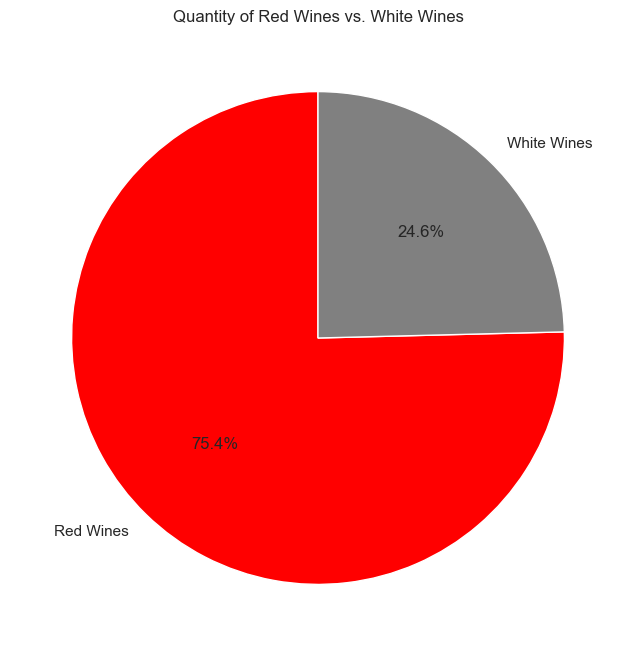

In [372]:
#A pie chart will shows the quantity of red vs. white wine.
#I calculated the quantity and then created a pie chart by inserting the count into the sample data.


# Sample data
red_wines =4897
white_wines = 1598

# Create a pie chart
labels = ['Red Wines', 'White Wines']
sizes = [red_wines, white_wines]
colors = ['red', 'grey']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Quantity of Red Wines vs. White Wines')

#Red wine's quantity is bigger than white's

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

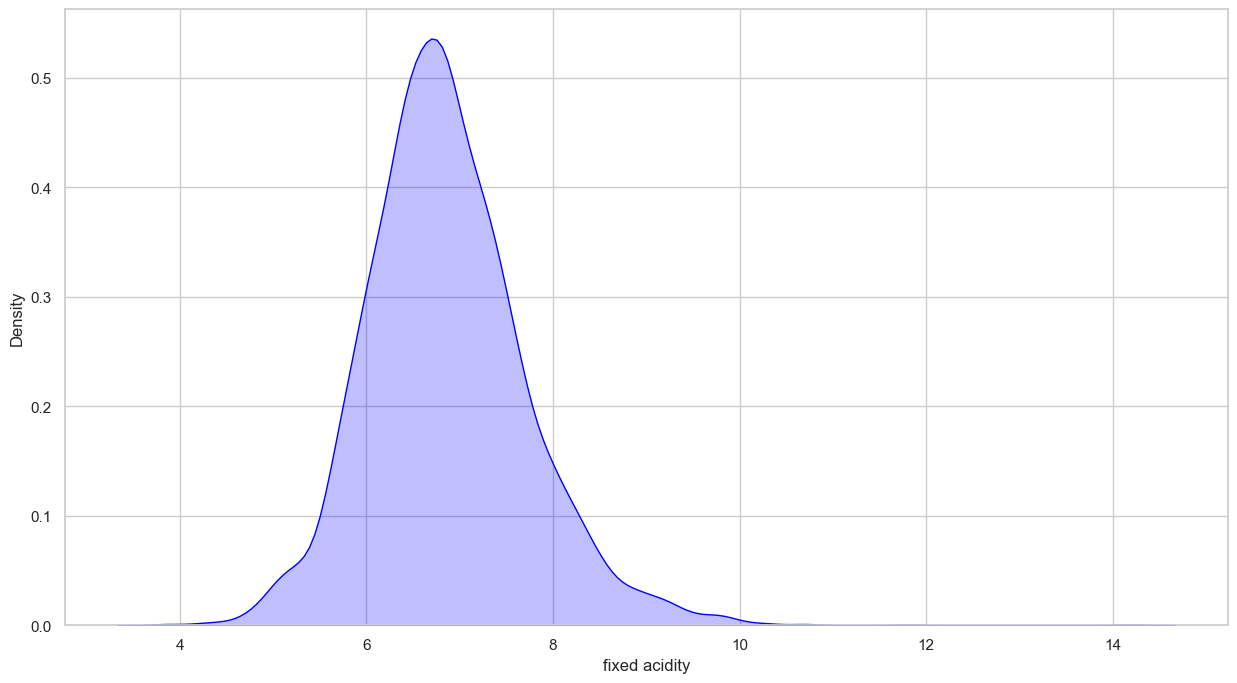

In [373]:
#A Density Plot visualises the distribution of data over the variable

sns.kdeplot(data=white_wine, x="fixed acidity", fill=True, color="blue")



<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

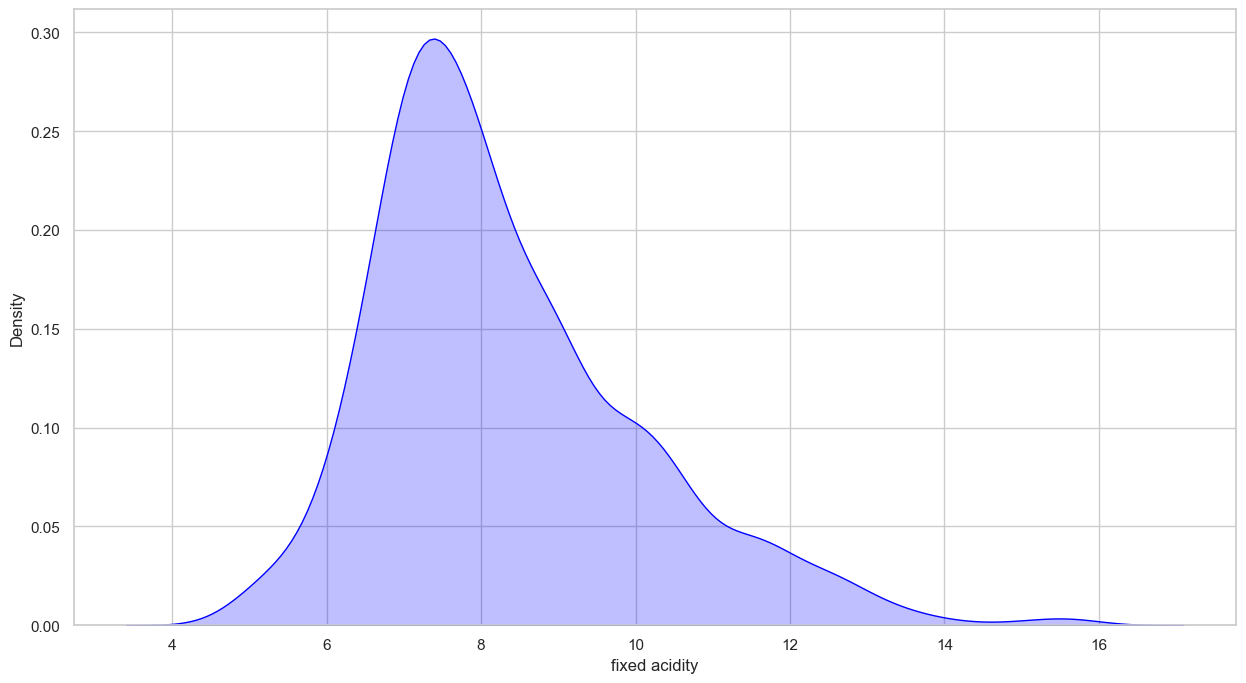

In [374]:
sns.kdeplot(data=red_wine, x="fixed acidity", fill=True, color="blue")

<AxesSubplot:xlabel='sulphates', ylabel='Density'>

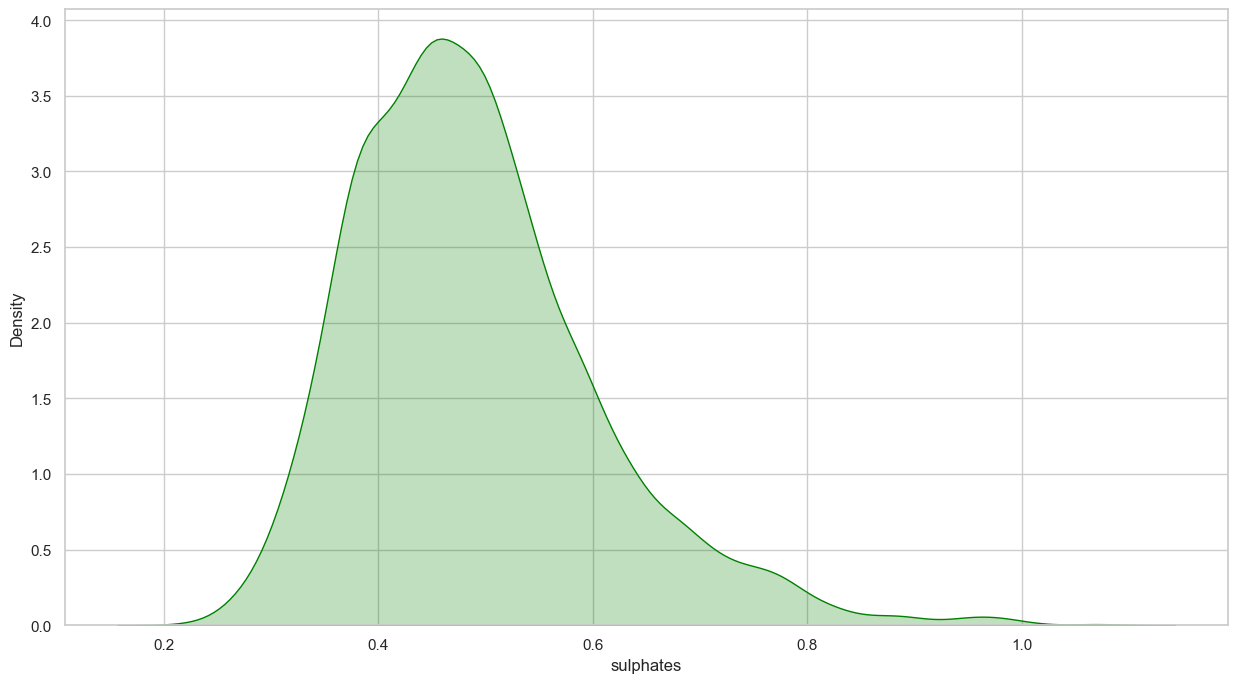

In [375]:
sns.kdeplot(data=white_wine, x="sulphates", fill=True, color="green")


<AxesSubplot:xlabel='sulphates', ylabel='Density'>

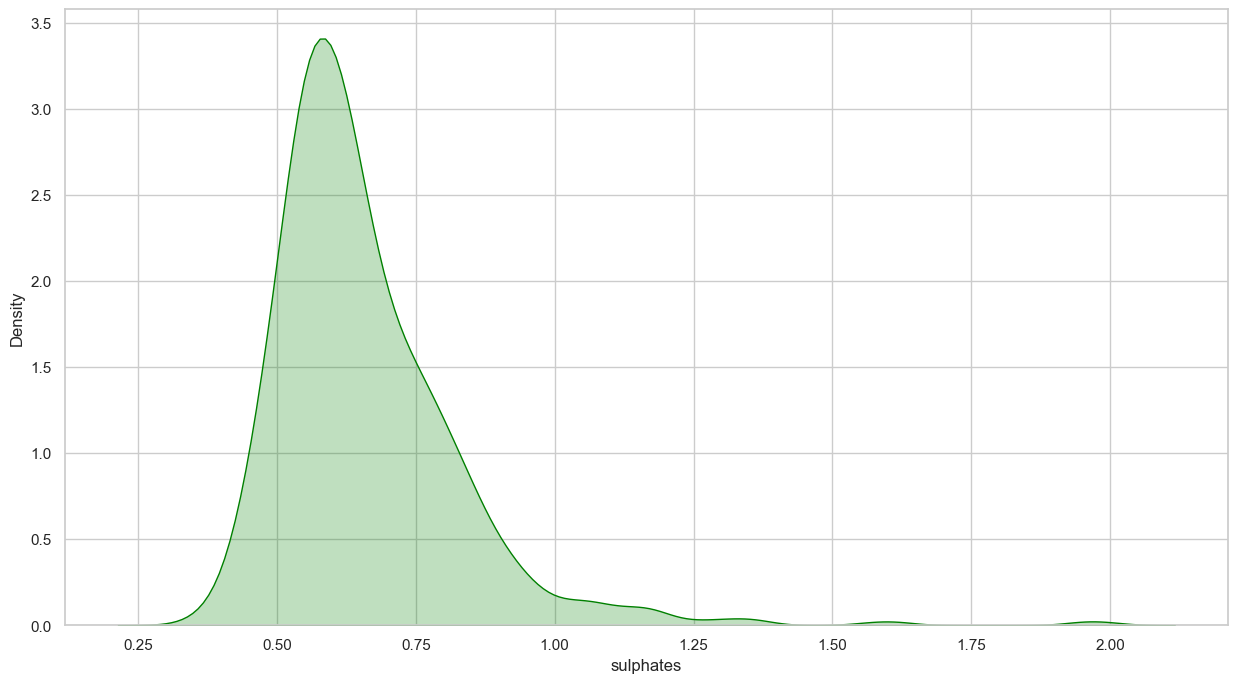

In [376]:
sns.kdeplot(data=red_wine, x="sulphates", fill=True, color="green")


<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

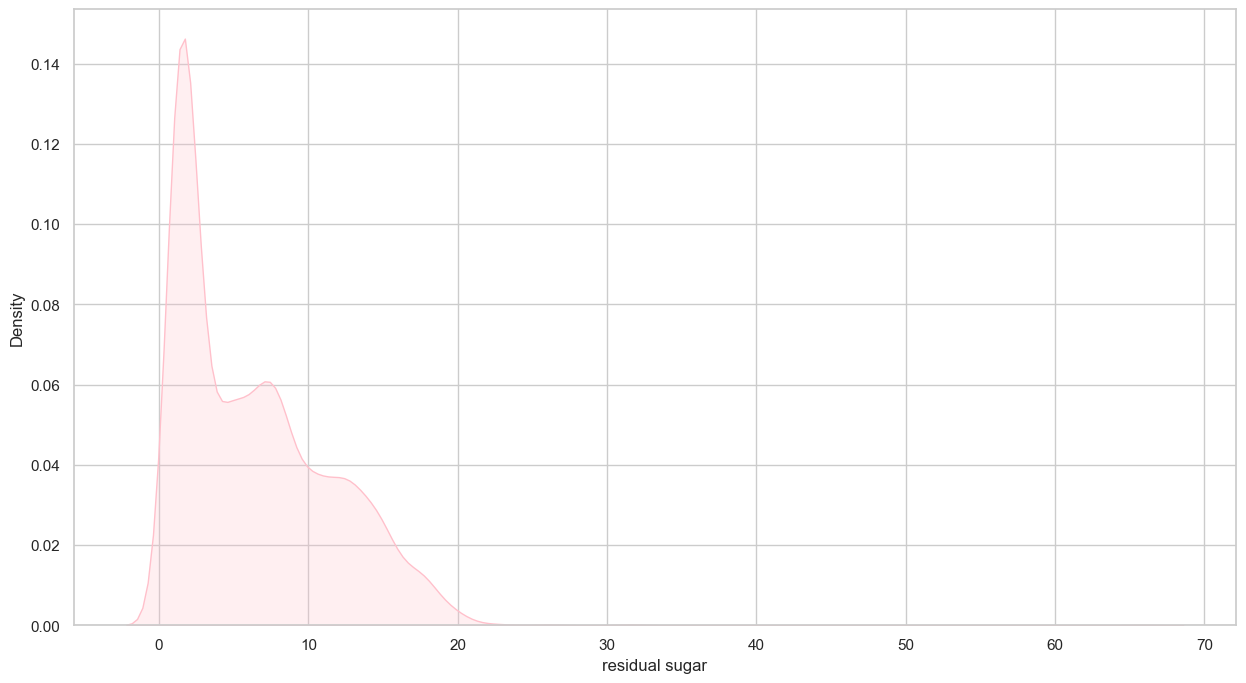

In [377]:
sns.kdeplot(data=white_wine, x="residual sugar", fill=True, color="pink")


<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

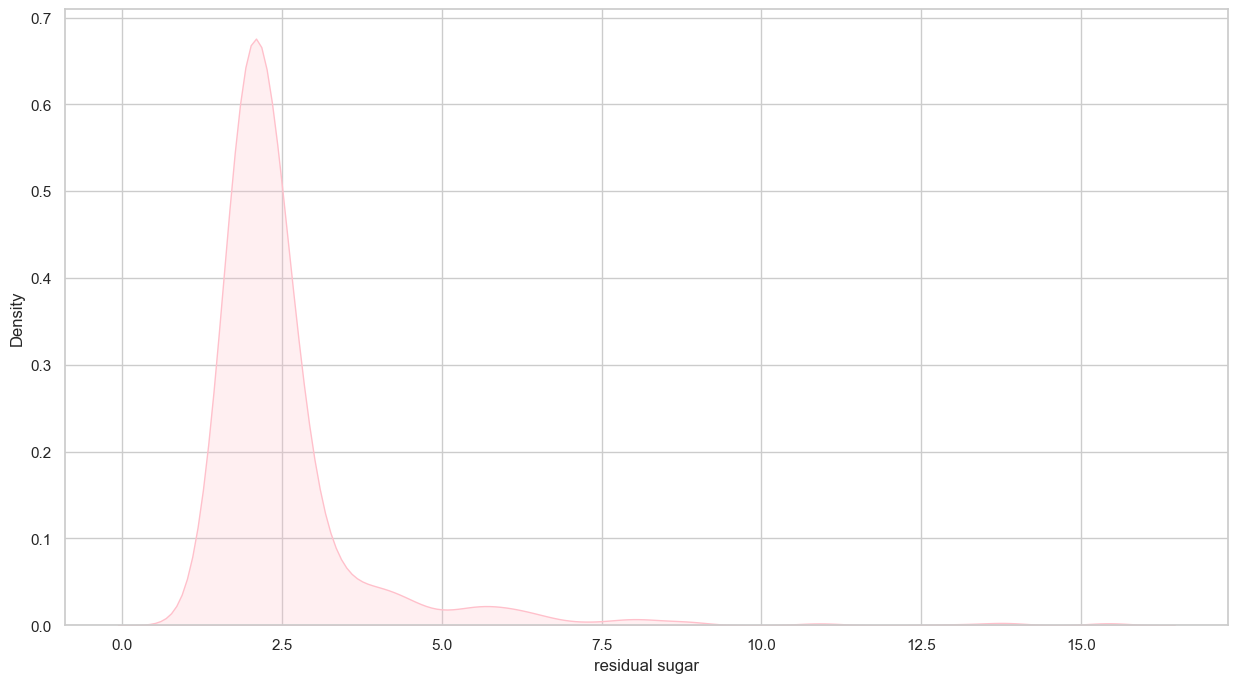

In [378]:
sns.kdeplot(data=red_wine, x="residual sugar", fill=True, color="pink")


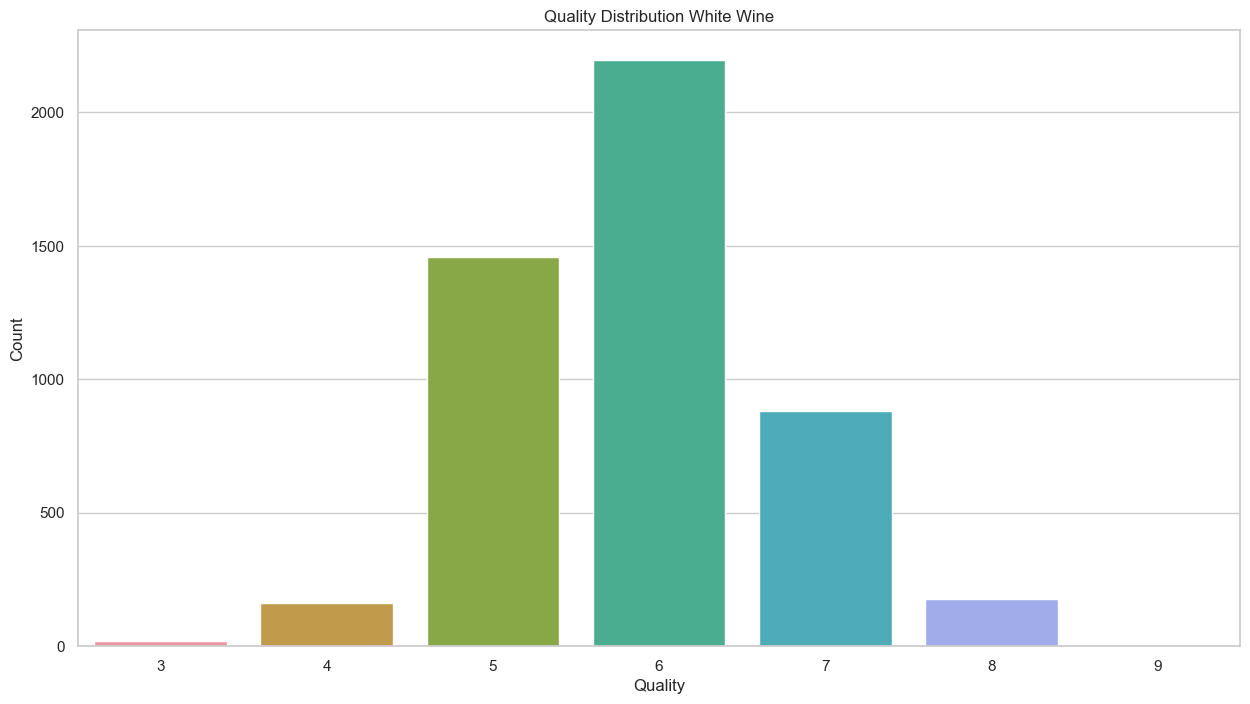

In [413]:
#Quality Disterbution

sns.set_style("whitegrid")

# Assuming the quality data is stored in a variable called 'quality'
sns.countplot(x='quality', data=white_wine)

# Set the labels for the x-axis, y-axis, and the title of the plot
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Quality Distribution White Wine')

# Show the plot
plt.show()


#Normal disterbution, majority of quality is meduim 

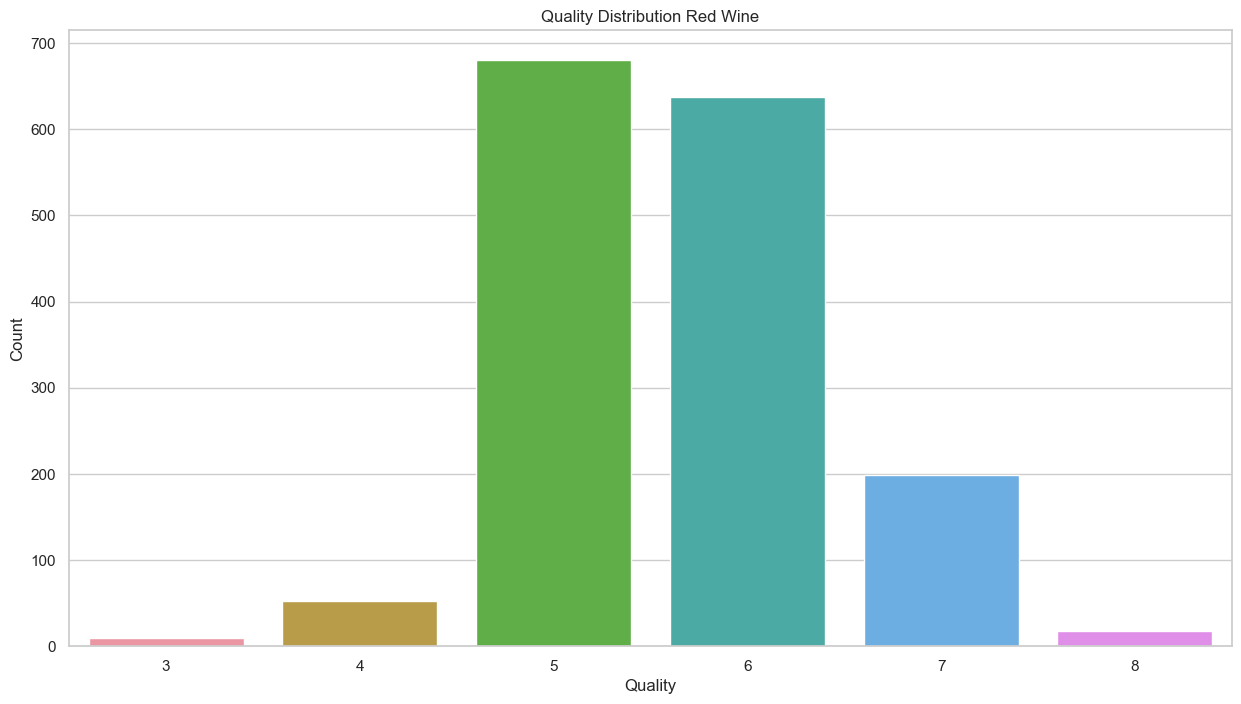

In [412]:
#Quality Disterbution

sns.set_style("whitegrid")

# Assuming the quality data is stored in a variable called 'quality'
sns.countplot(x='quality', data=red_wine)

# Set the labels for the x-axis, y-axis, and the title of the plot
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Quality Distribution Red Wine')

# Show the plot
plt.show()

<AxesSubplot:xlabel='quality', ylabel='Count'>

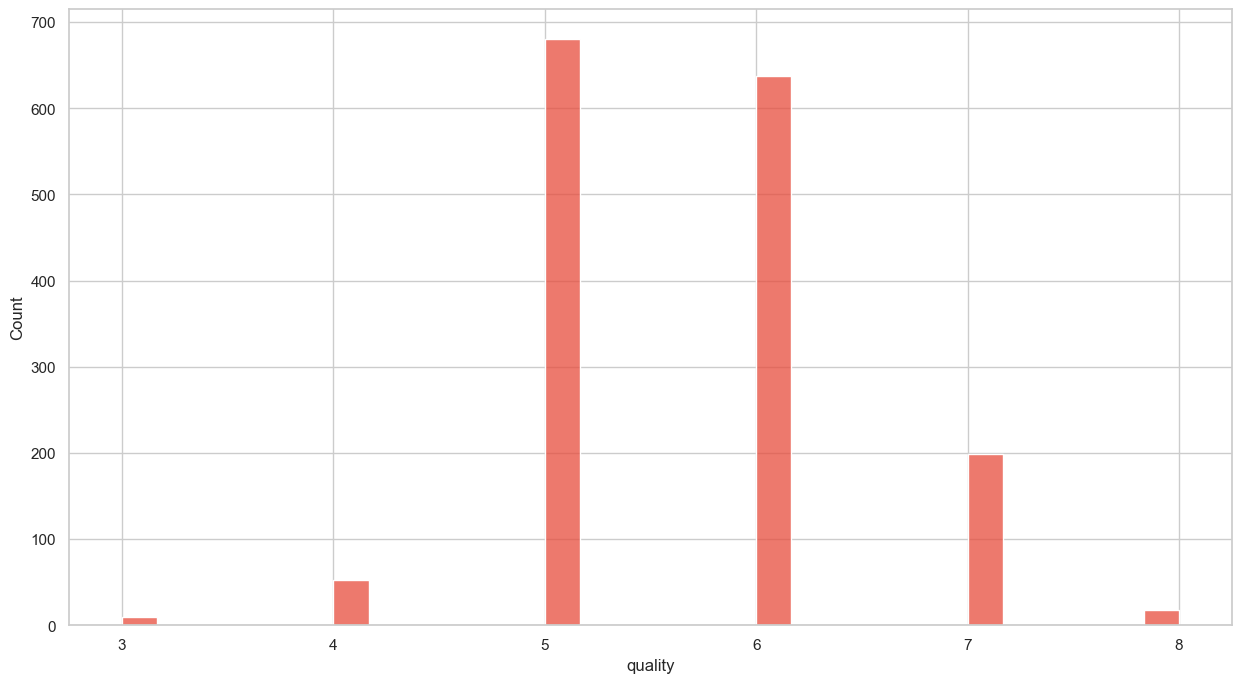

In [414]:
# Create a sample data frame
data = red_wine


# Use seaborn to create a histogram of the data
sns.histplot(data=red_wine, x="quality")

<AxesSubplot:xlabel='quality', ylabel='Count'>

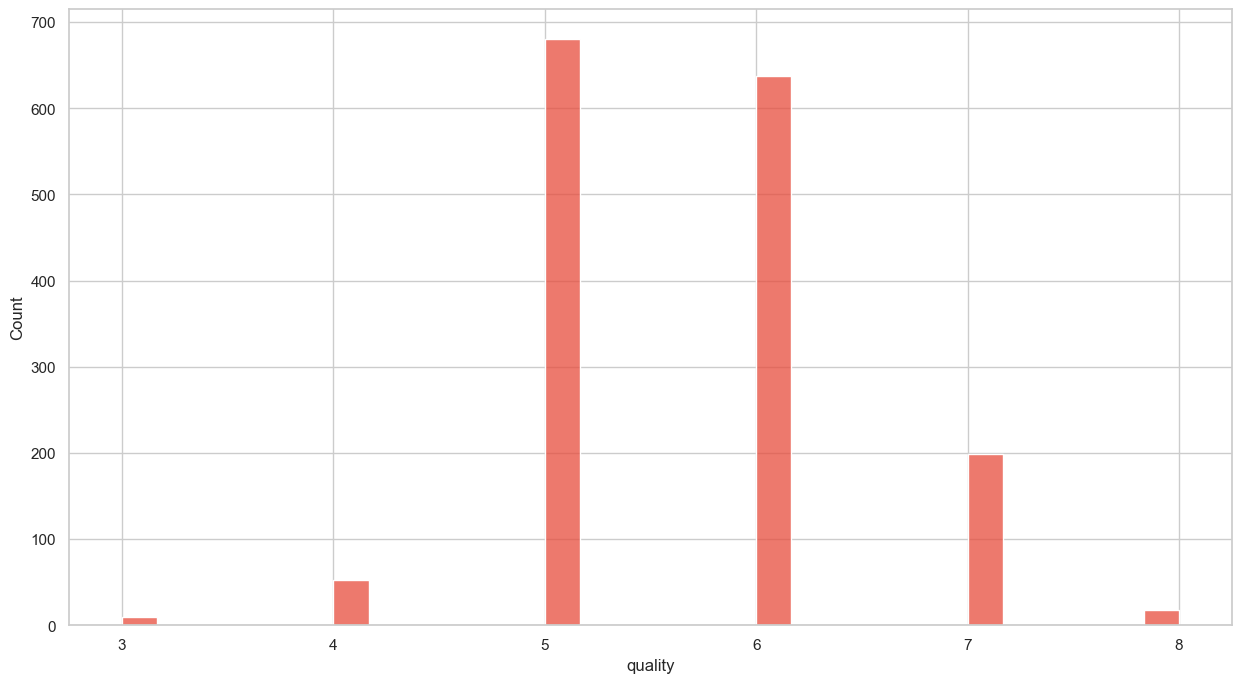

In [415]:
# Create a sample data frame
data = white_wine


# Use seaborn to create a histogram of the data
sns.histplot(data=red_wine, x="quality")

#Normal disterbution, majority of quality is meduim 

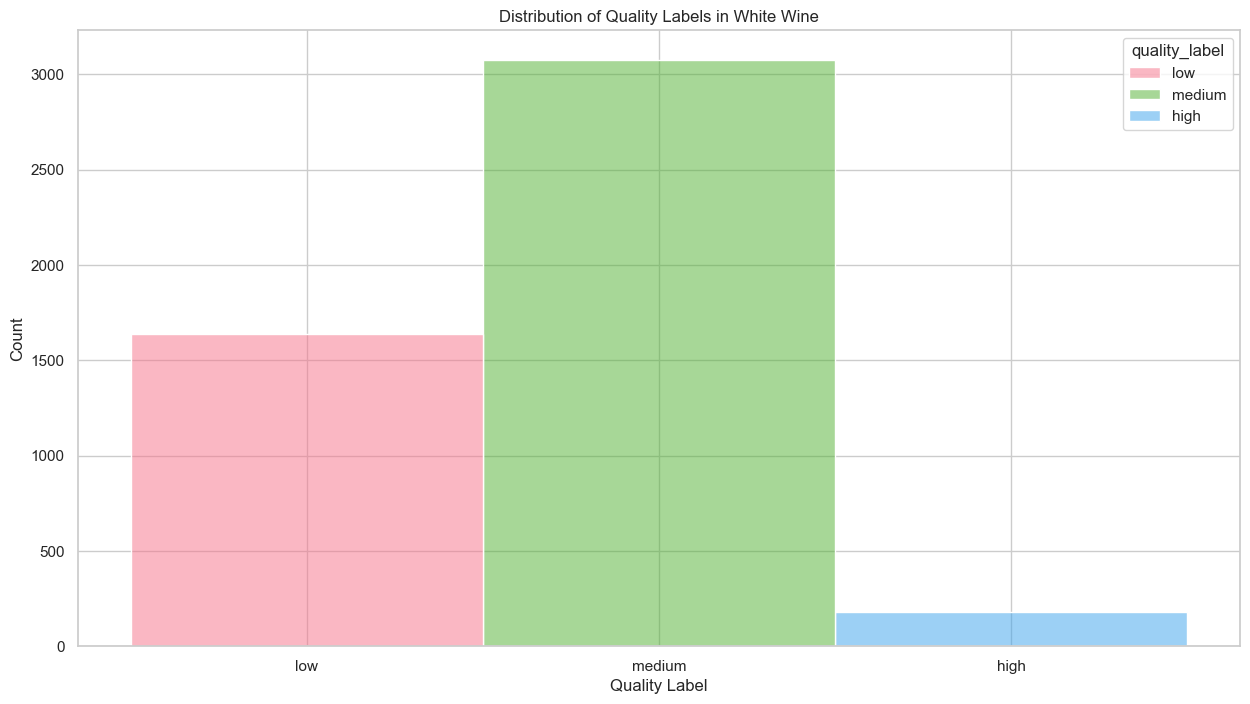

In [411]:

# Lets create a histogram of the quality ratings for red wines
# Set the color palette
colors = ["#E74C3C", "#3498DB"]
sns.set_palette(sns.color_palette(colors))

# Plot the histogram
sns.histplot(data=white_wine, x="quality_label", hue="quality_label", binwidth=0.2)

# Add axis labels
plt.xlabel("Quality Label")
plt.ylabel("Count")

# Add a title
plt.title("Distribution of Quality Labels in White Wine")

# Show the plot
plt.show()

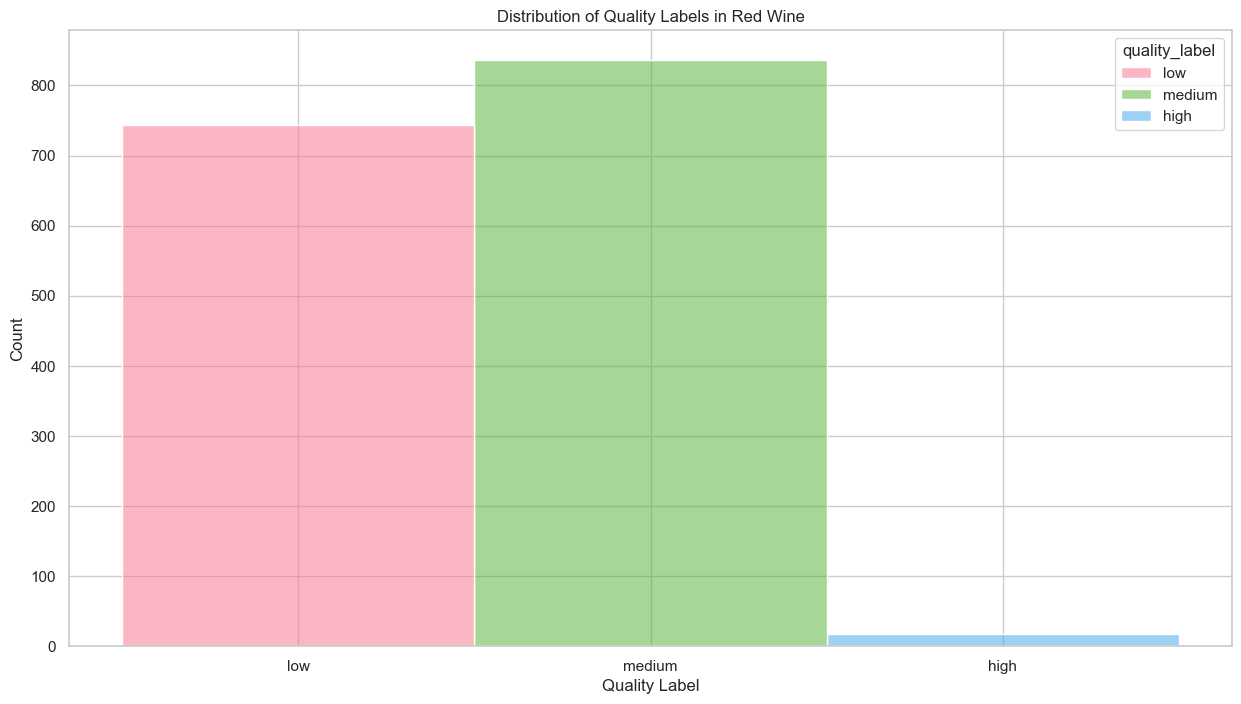

In [403]:

# Set the color palette
colors = ["#E74C3C", "#3498DB"]
sns.set_palette(sns.color_palette(colors))

# Plot the histogram
sns.histplot(data=red_wine, x="quality_label", hue="quality_label", binwidth=0.2)

# Add axis labels
plt.xlabel("Quality Label")
plt.ylabel("Count")

# Add a title
plt.title("Distribution of Quality Labels in Red Wine")

# Show the plot
plt.show()
plt.show()

Text(0.5, 1.0, 'Red_Wine')

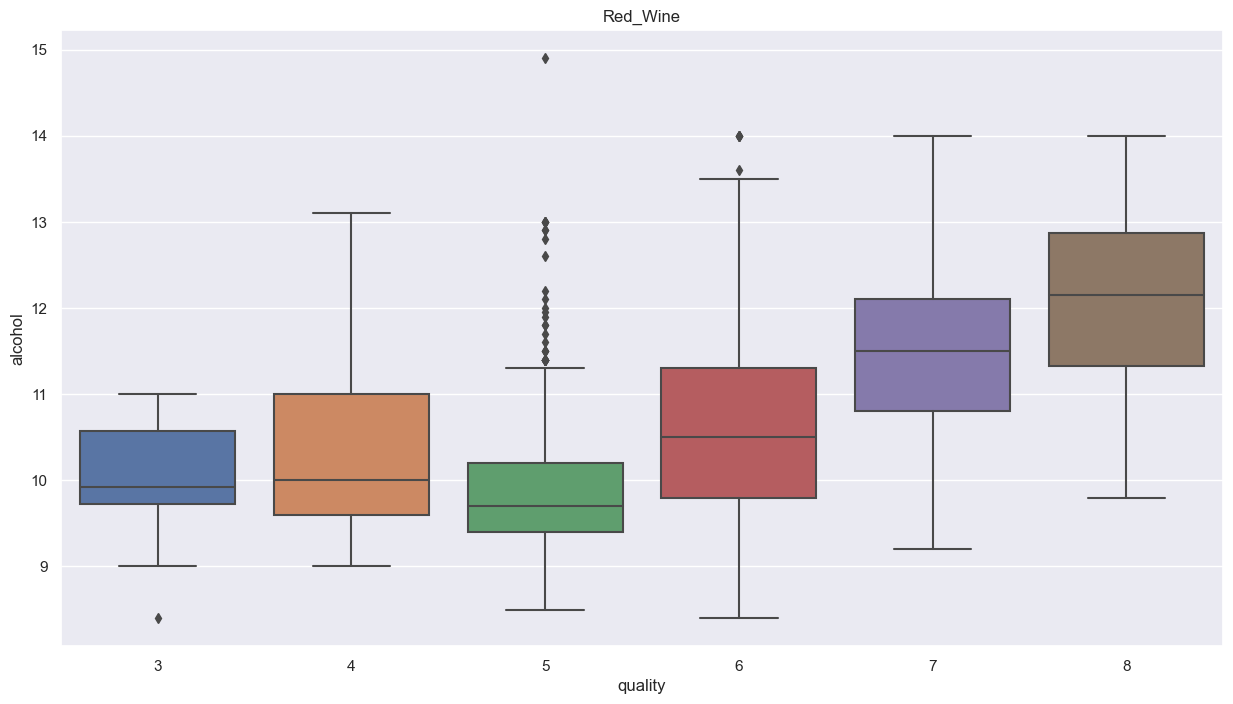

In [443]:
sns.boxplot(data=red_wine, x="quality", y="alcohol")
plt.title("Red_Wine")


Text(0.5, 1.0, 'White_Wine')

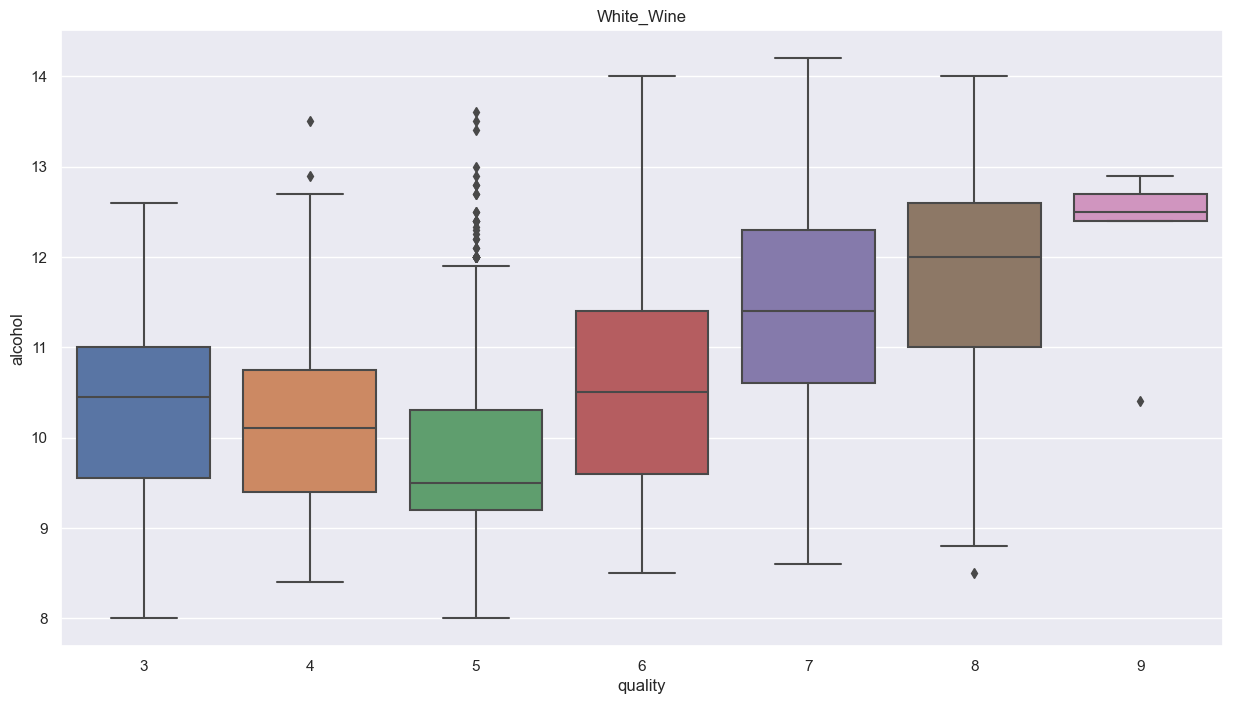

In [442]:
# Create a boxplot
sns.boxplot(data=white_wine, x="quality", y="alcohol")
plt.title("White_Wine")



#The median alcohol content appears to increase as the quality rating increases, which suggests a positive correlation between alcohol and quality.

The interquartile range (IQR) of alcohol content appears to narrow slightly as quality increases, which suggests that there may be less variability in alcohol content among higher-quality white wines.

There are several outliers in the highest quality category (i.e., quality = 9), which suggests that some high-quality white wines may have very high alcohol content relative to the rest of the dataset

Outliners in 5 quality level - tail of the boxplot

Text(0.5, 1.0, 'Red_Wine pH vs. quality')

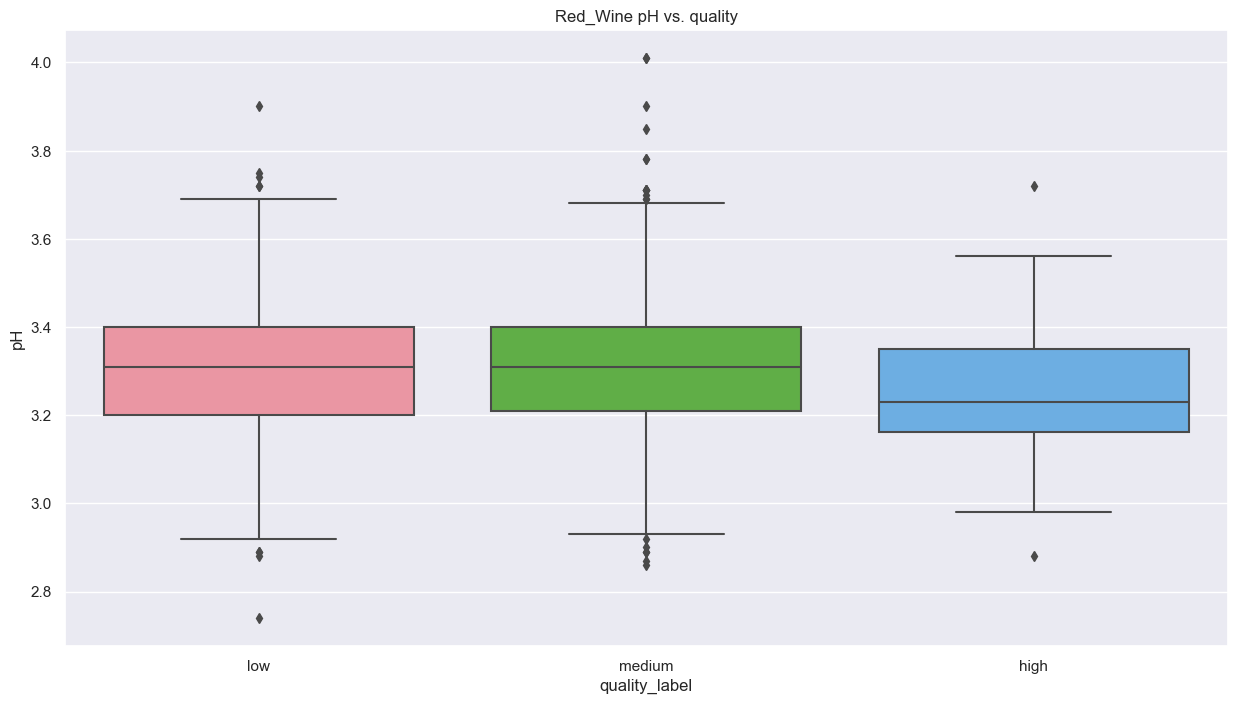

In [ ]:
#Create a boxplot
sns.boxplot(data=red_wine, x="quality_label", y="pH")
plt.title("Red_Wine pH vs. quality")

#The pH level of red wine with higher quality (excellent and good) tends to have a slightly lower median value than those with lower quality (average, below average, and poor).
The interquartile range (IQR) of pH level for each quality level is relatively narrow, indicating that the pH level is consistent within each quality level.
The range of pH level for red wine with higher quality (excellent and good) is smaller than that of lower quality (average, below average, and poor).
There are some outliers in the below average and poor quality categories, indicating that there may be some red wines with pH levels outside of the typical range for those quality levels.

Text(0.5, 1.0, 'White_Wine pH vs. quality')

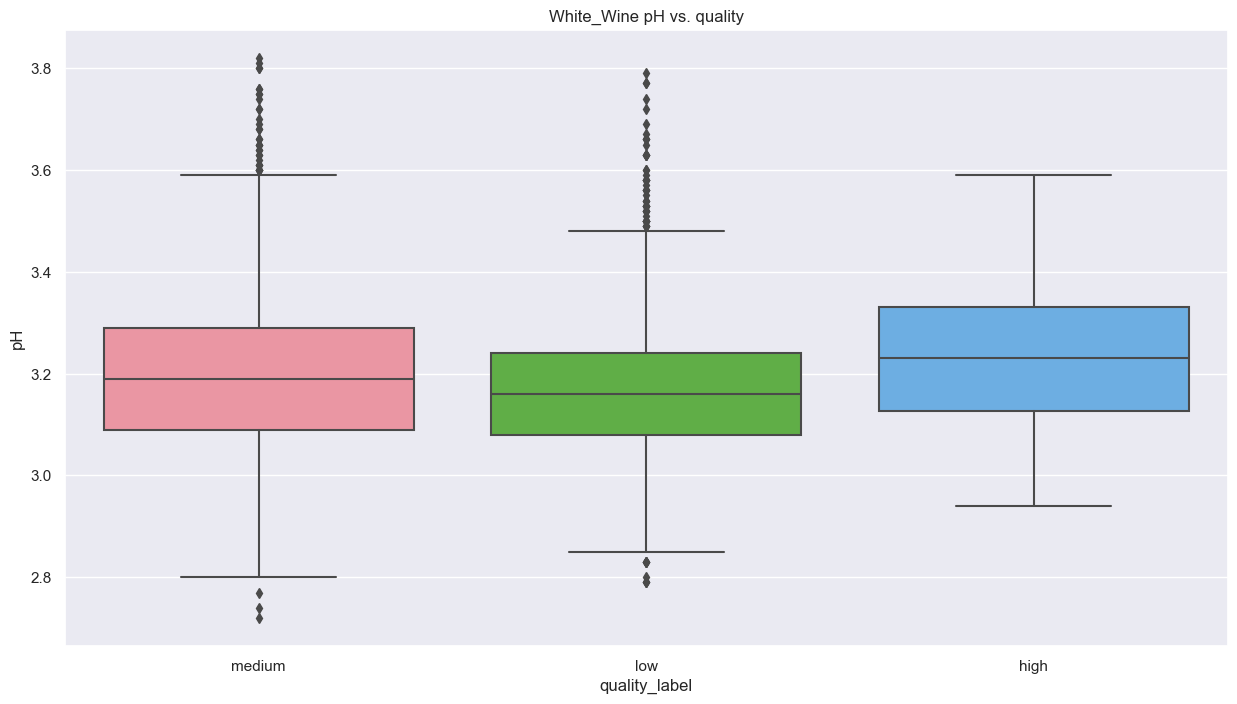

In [ ]:
#Create a boxplot
sns.boxplot(data=white_wine, x="quality_label", y="pH")
plt.title("White_Wine pH vs. quality")

#The pH level of white wine with higher quality (excellent and good) tends to have a slightly lower median value than those with lower quality (average, below average, and poor).
The interquartile range (IQR) of pH level for each quality level is relatively narrow, indicating that the pH level is consistent within each quality level.
The range of pH level for white wine with higher quality (excellent and good) is smaller than that of lower quality (average, below average, and poor).
There are some outliers in the below average and poor quality categories, indicating that there may be some white wines with pH levels outside of the typical range for those quality levels

<AxesSubplot:xlabel='pH', ylabel='Count'>

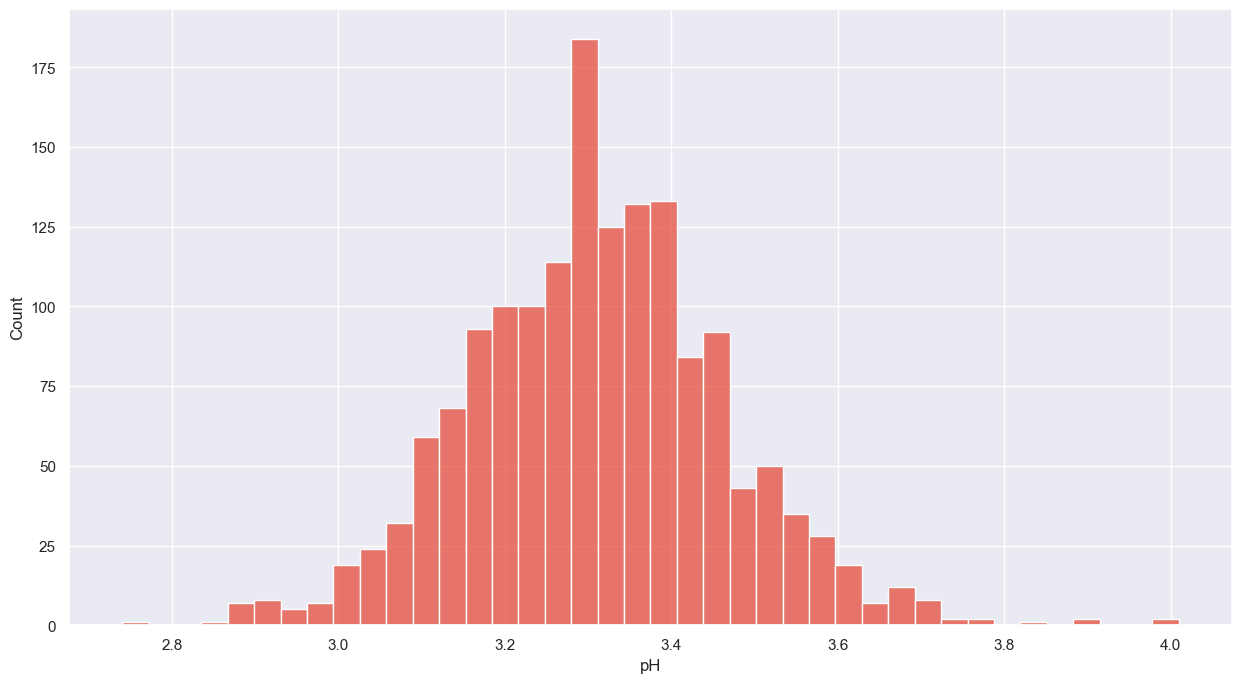

In [ ]:

# Create a sample data frame for pH
data = red_wine


# Use seaborn to create a histogram of the data
sns.histplot(data=red_wine, x="pH")

#pH is slightly higher than

<AxesSubplot:xlabel='pH', ylabel='Count'>

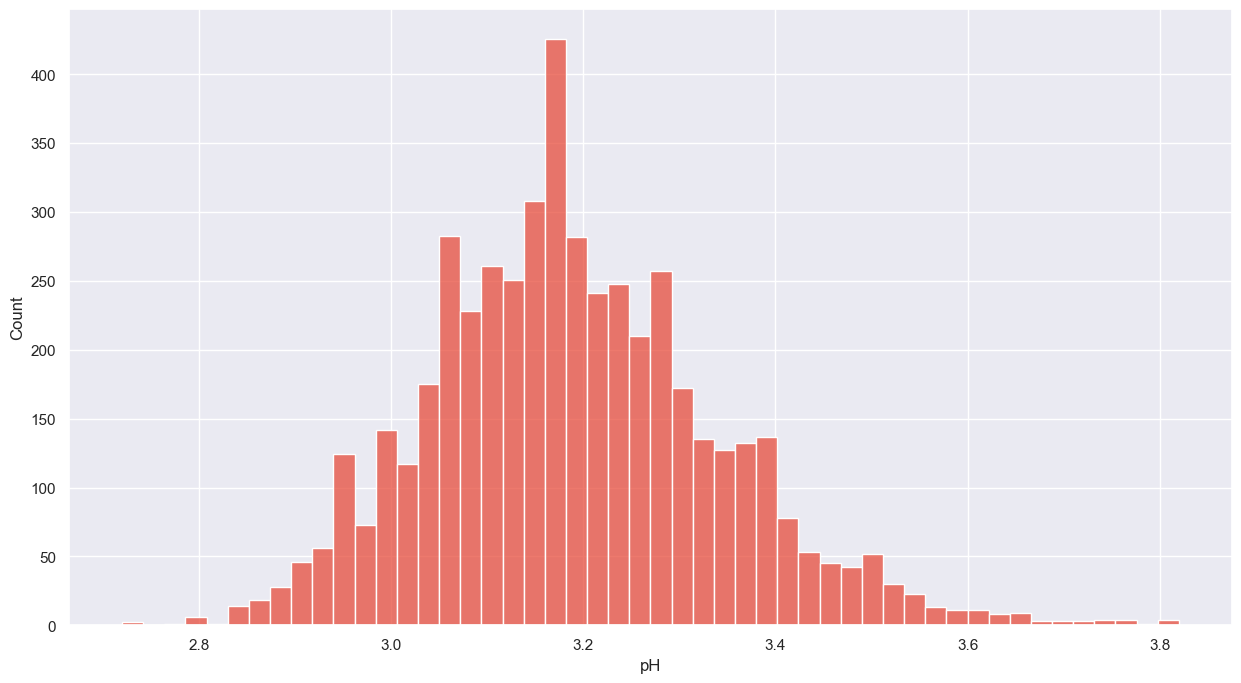

In [ ]:
# Create a sample data frame for pH
data = white_wine


# Use seaborn to create a histogram of the data
sns.histplot(data=white_wine, x="pH")

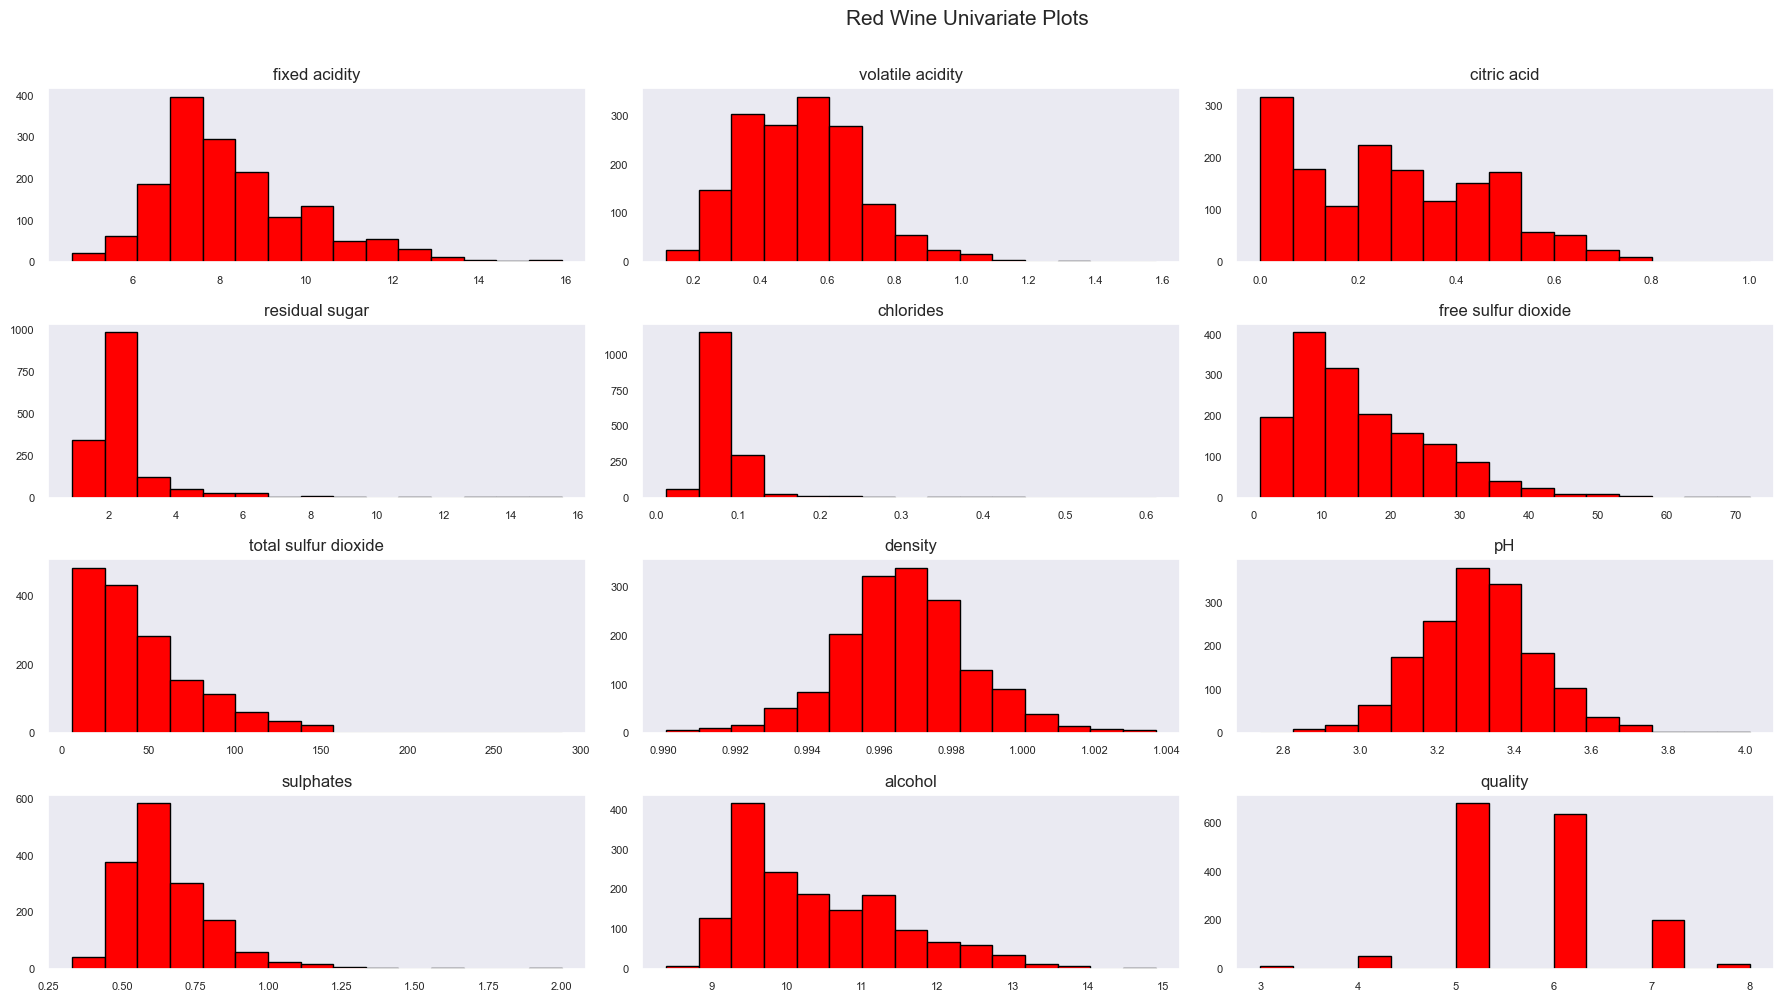

In [ ]:
red_wine.hist(bins=15, color='red', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)

plt.tight_layout(rect=(0, 0, 1.2, 1.2))

rt = plt.suptitle('Red Wine Univariate Plots', x=0.65, y=1.25, fontsize=15)

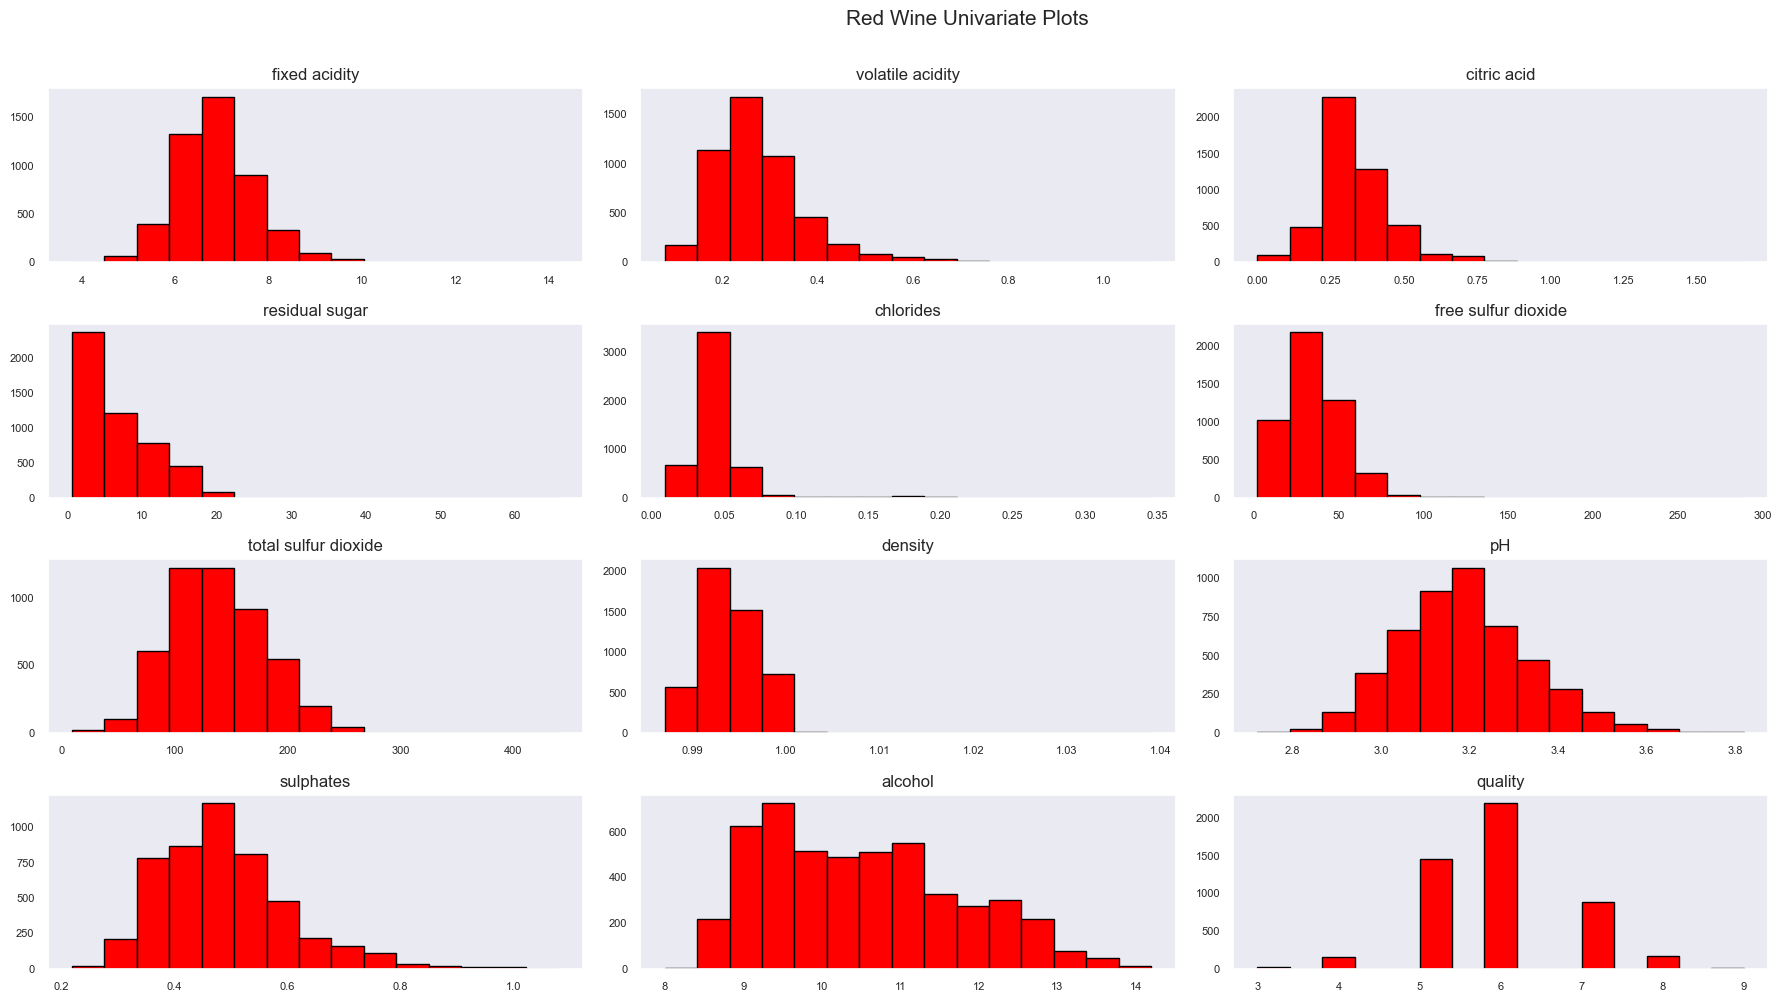

In [ ]:
white_wine.hist(bins=15, color='red', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)

plt.tight_layout(rect=(0, 0, 1.2, 1.2))

rt = plt.suptitle('Red Wine Univariate Plots', x=0.65, y=1.25, fontsize=15)

In [444]:
#One-Way Anova Test



F, p = stats.f_oneway(red_wine[red_wine['quality_label'] == 'low']['alcohol'],
red_wine[red_wine['quality_label'] == 'medium']['alcohol'],
red_wine[red_wine['quality_label'] == 'high']['alcohol'])
print('ANOVA test for mean alcohol levels across red wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)


ANOVA test for mean alcohol levels across red wine samples with different quality ratings
F Statistic: 205.23448800361507 	p-value: 4.776936653588672e-80


#The null hypothesis is that there is no significant difference in the mean alcohol levels across the different quality ratings of wine samples. The very low p-value obtained ( 4.776936653588672e-80) indicates strong evidence against the null hypothesis, providing strong evidence to reject it. Evidance for the alternative hypothesis.

Therefore, we can conclude that there is a significant difference in the mean alcohol levels across wine samples with different quality ratings. 

In [ ]:
F, p = stats.f_oneway(white_wine[white_wine['quality_label'] == 'low']['alcohol'],
white_wine[white_wine['quality_label'] == 'medium']['alcohol'],
white_wine[white_wine['quality_label'] == 'high']['alcohol'])
print('ANOVA test for mean alcohol levels across white wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

ANOVA test for mean alcohol levels across wine samples with different quality ratings
F Statistic: 478.1628922043277 	p-value: 2.0647901873531918e-190


#The null hypothesis - there is no significant difference in the mean alcohol levels across the different quality ratings of wine samples. The very low p-value obtained (2.0647901873531918e-190) indicates strong evidence against the null hypothesis, providing strong evidence to reject it. Evidance for the alternative hypothesis.

Therefore, we can conclude that there is a significant difference in the mean alcohol levels across wine samples with different quality ratings. 

In [459]:

import scipy.stats as stats

#Perform Anova Test
F, p = stats.f_oneway(
                      
                      red_wine.loc[red_wine['quality']==3, 'alcohol'],
                      red_wine.loc[red_wine['quality']==4, 'alcohol'],
                      red_wine.loc[red_wine['quality']==5, 'alcohol'],
                      red_wine.loc[red_wine['quality']==6, 'alcohol'],
                      red_wine.loc[red_wine['quality']==7, 'alcohol'],
                      red_wine.loc[red_wine['quality']==8, 'alcohol'],
                      
)

print('ANOVA test for mean alcohol levels across red wine samples with quality ratings')
print('F Statistic:', F, '\tp-value:', p)



ANOVA test for mean alcohol levels across red wine samples with quality ratings
F Statistic: 115.85479746682736 	p-value: 1.2098951580566747e-104


#the null hypothesis: that there is no significant difference in mean alcohol levels among the red wine samples with different quality ratings (quality ratings 3 to 8).
#the alternative hypothesis would be that there is a significant difference in mean alcohol levels among the different quality ratings.

#The very small p-value (1.2098951580566747e-104) indicates that there is extremely strong evidence against the null hypothesis, meaning that there is a significant difference in mean alcohol levels among the red wine samples with different quality rating. In other words, the quality rating of the wine has a significant effect on the alcohol levels.

#The F-statistic (115.85479746682736) is a measure of the variation between the group means relative to the variation within the groups. A larger F-statistic suggests that there is more variation between the groups, which provides evidence against the null hypothesis. The fact that the F-statistic is large and the p-value is very small both indicate that the null hypothesis can be rejected in favor of the alternative hypothesis.

In [463]:


#Perform Anova Test
F, p = stats.f_oneway(
                      
                      white_wine.loc[white_wine['quality']==3, 'alcohol'],
                      white_wine.loc[white_wine['quality']==4, 'alcohol'],
                      white_wine.loc[white_wine['quality']==5, 'alcohol'],
                      white_wine.loc[white_wine['quality']==6, 'alcohol'],
                      white_wine.loc[white_wine['quality']==7, 'alcohol'],
                      white_wine.loc[white_wine['quality']==8, 'alcohol'],
                      white_wine.loc[white_wine['quality']==9, 'alcohol']
)

print('ANOVA test for mean alcohol levels across white wine samples with quality ratings')
print('F Statistic:', F, '\tp-value:', p)


ANOVA test for mean alcohol levels across white wine samples with quality ratings
F Statistic: 229.7347722746666 	p-value: 2.92542743209542e-259


##the null hypothesis: that there is no significant difference in mean alcohol levels among the red wine samples with different quality ratings (quality ratings 3 to 9).
#the alternative hypothesis would be that there is a significant difference in mean alcohol levels among the different quality ratings.

#with an F-statistic of 229.73 and a very small p-value of 2.93e-259, it means that there is strong evidence against the null hypothesis. Specifically, it suggests that there is a significant difference in mean alcohol levels among the white wine samples with different quality ratings (quality ratings 3 to 9). In other words, the quality rating of the white wine samples is associated with a significant difference in mean alcohol levels.

Since the p-value is very small, it suggests that the observed difference in mean alcohol levels among the different quality ratings is significat.  Therefore, we can reject the null hypothesis and conclude that there is a significant difference in mean alcohol levels among the white wine samples with different quality ratings.

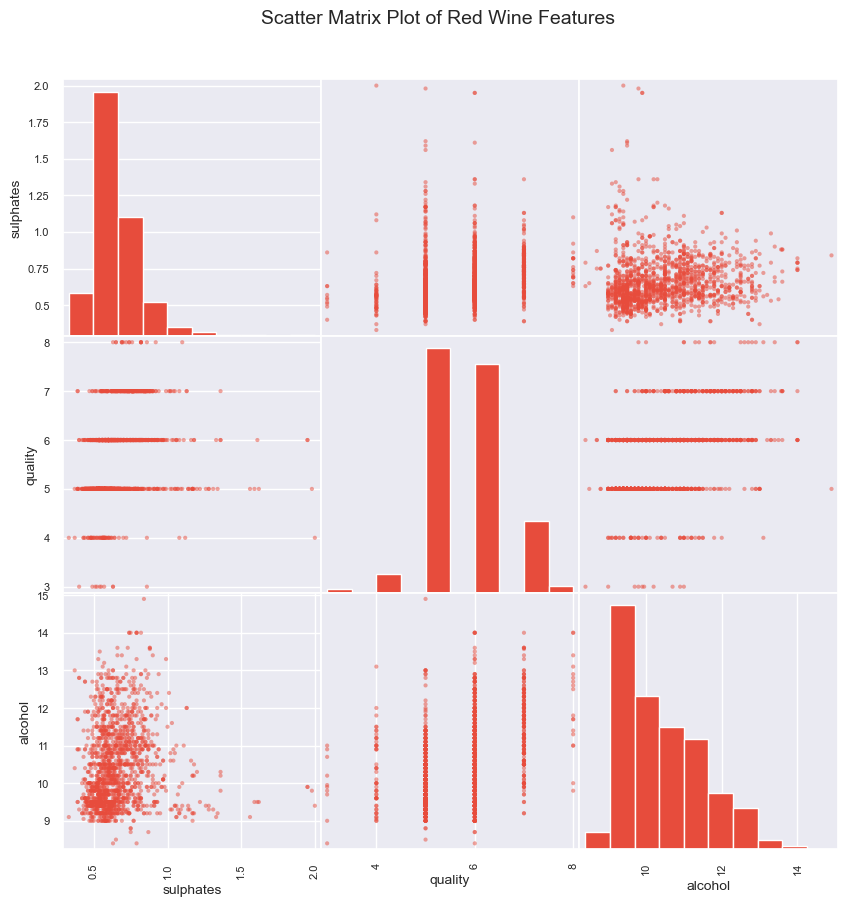

In [ ]:
data = red_wine

# Select the variables to plot
variables = ['sulphates', 'quality', 'alcohol']

# Create the scatter matrix plot
scatter_matrix = pd.plotting.scatter_matrix(data[variables], figsize=(10, 10))

# Set the axis labels and titles
for ax in scatter_matrix.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=10, rotation=0)
    ax.set_ylabel(ax.get_ylabel(), fontsize=10, rotation=90)
    
plt.suptitle('Scatter Matrix Plot of Red Wine Features', fontsize=14, y=0.95)
plt.show()


#From this plot, you can gain insights about the relationships between the variables. For example, you can see whether any of the pairs of variables have a linear relationship or if they are mostly uncorrelated. You can also see the distribution of each variable along the diagonal of the plot, which can help you identify any outliers or unusual patterns in the data. Additionally, you can observe any correlations between the variables by looking at the overall pattern of the scatter plot matrix.

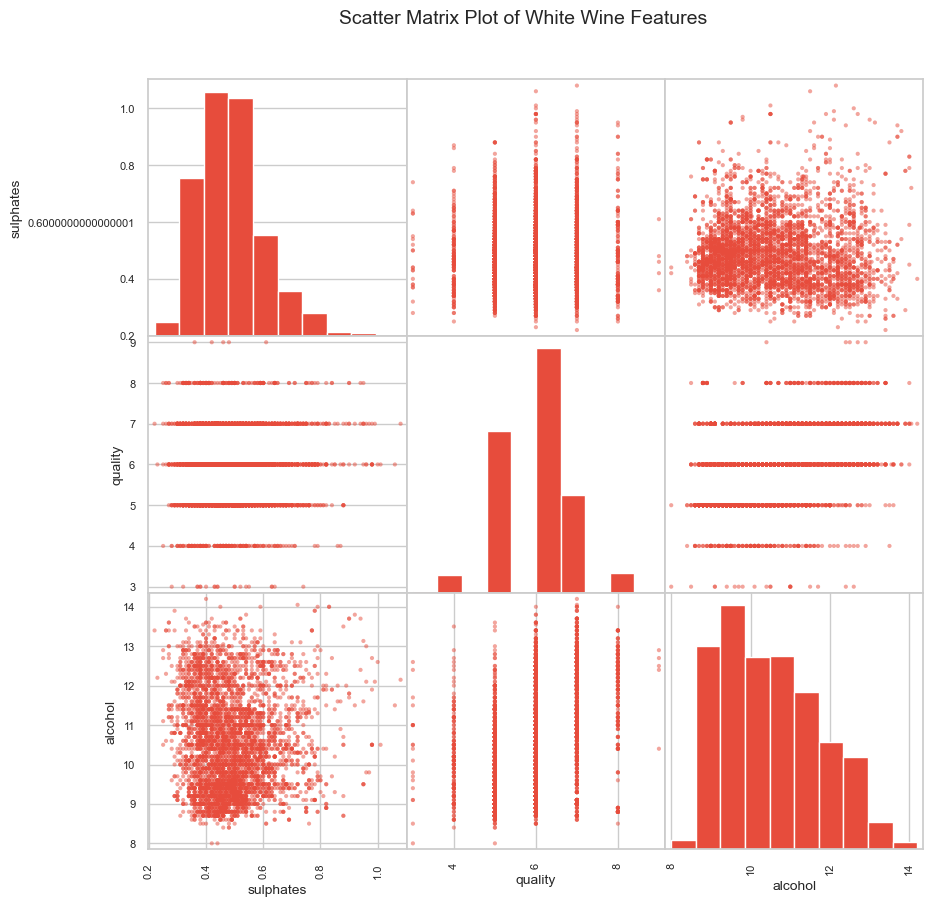

In [426]:
data = white_wine

# Select the variables to plot
variables = ['sulphates', 'quality', 'alcohol']

# Create the scatter matrix plot
scatter_matrix = pd.plotting.scatter_matrix(data[variables], figsize=(10, 10))

# Set the axis labels and titles
for ax in scatter_matrix.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=10, rotation=0)
    ax.set_ylabel(ax.get_ylabel(), fontsize=10, rotation=90)
    
plt.suptitle('Scatter Matrix Plot of White Wine Features', fontsize=14, y=0.95)
plt.show()

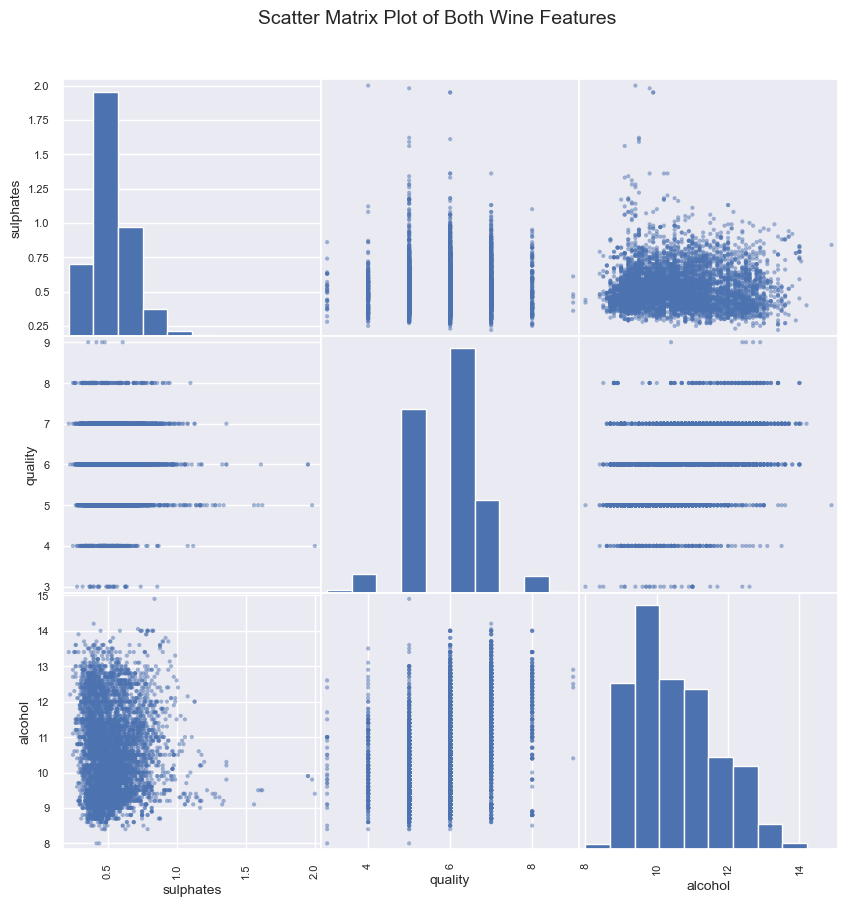

In [441]:
data = df_wine

# Select the variables to plot
variables = ['sulphates', 'quality', 'alcohol']

# Create the scatter matrix plot
scatter_matrix = pd.plotting.scatter_matrix(data[variables], figsize=(10, 10))

# Set the axis labels and titles
for ax in scatter_matrix.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=10, rotation=0)
    ax.set_ylabel(ax.get_ylabel(), fontsize=10, rotation=90)
    
plt.suptitle('Scatter Matrix Plot of Both Wine Features', fontsize=14, y=0.95)
plt.show()

#There appears to be a positive correlation between alcohol and quality. This suggests that wines with higher alcohol content tend to be rated higher in quality.

There also appears to be a positive correlation between sulphates and quality, although the relationship is less strong than the one between alcohol and quality.

The scatter matrix plot also shows the distributions of each variable along the diagonal of the plot. The quality variable appears to be approximately normally distributed, while the sulphates and alcohol variables are skewed to the right.

The scatter plots in the off-diagonal cells of the matrix show the relationship between pairs of variables. For example, the scatter plot in the cell where sulphates is on the y-axis and quality is on the x-axis shows a positive correlation between these two variables.

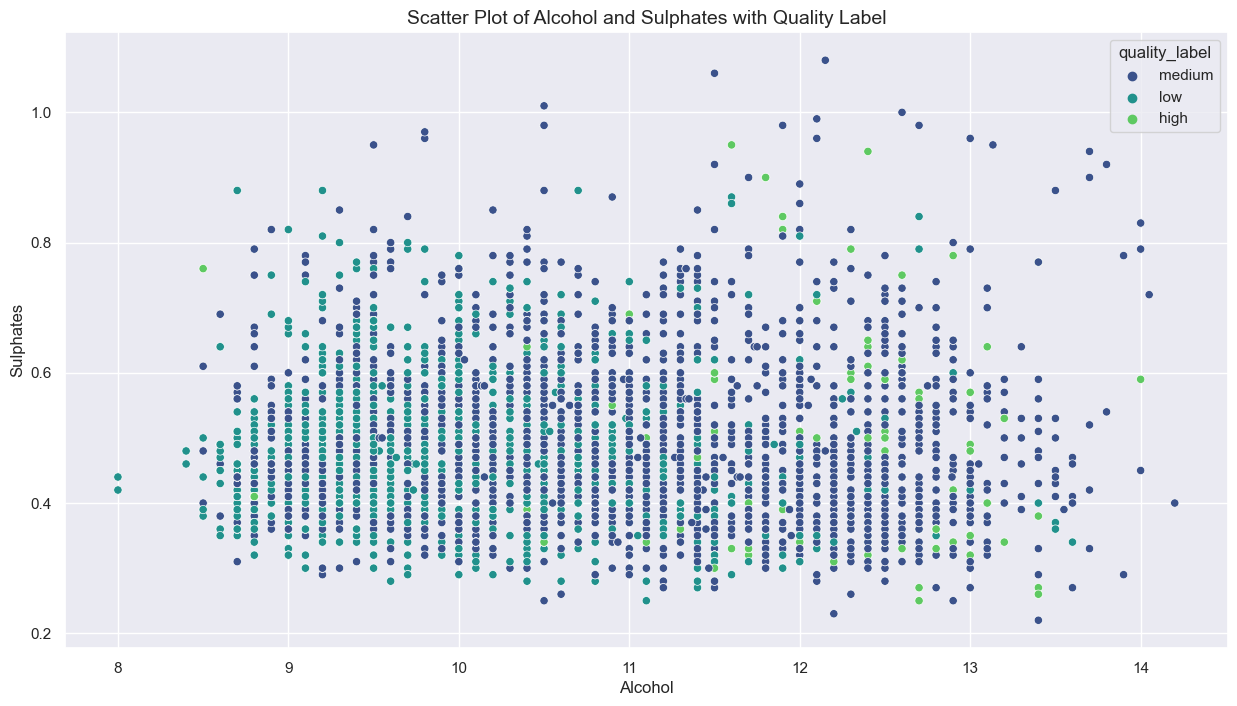

In [ ]:
data = white_wine

# Select the variables to plot
x = data['alcohol']
y = data['sulphates']
hue = data['quality_label']

# Create the scatter plot
sns.scatterplot(x=x, y=y, hue=hue, palette='viridis')

# Set the axis labels and title
plt.xlabel('Alcohol', fontsize=12)
plt.ylabel('Sulphates', fontsize=12)
plt.title('Scatter Plot of Alcohol and Sulphates with Quality Label', fontsize=14)

# Show the plot
plt.show()


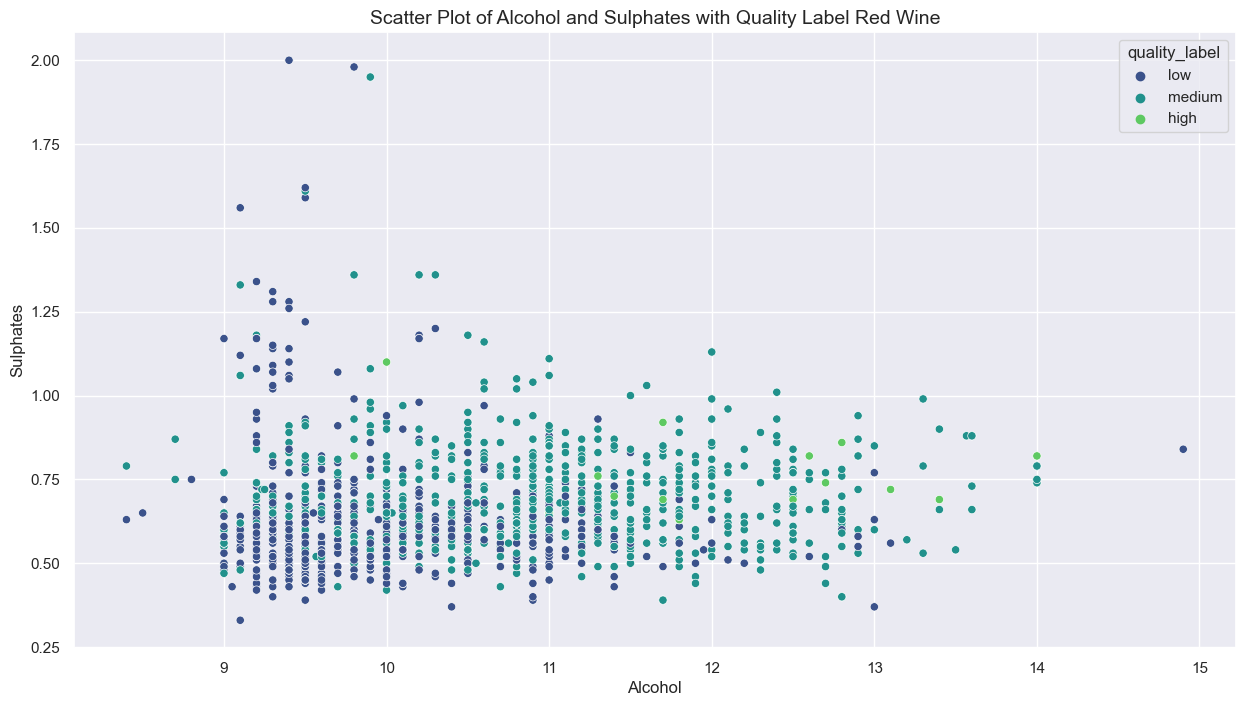

In [ ]:
data = red_wine

# Select the variables to plot
x = data['alcohol']
y = data['sulphates']
hue = data['quality_label']

# Create the scatter plot
sns.scatterplot(x=x, y=y, hue=hue, palette='viridis')

# Set the axis labels and title
plt.xlabel('Alcohol', fontsize=12)
plt.ylabel('Sulphates', fontsize=12)
plt.title('Scatter Plot of Alcohol and Sulphates with Quality Label Red Wine', fontsize=14)

# Show the plot
plt.show()


<AxesSubplot:title={'center':'Scatter Plot of Alcohol and Sulphates with Quality Label White Wine'}, xlabel='alcohol', ylabel='sulphates'>

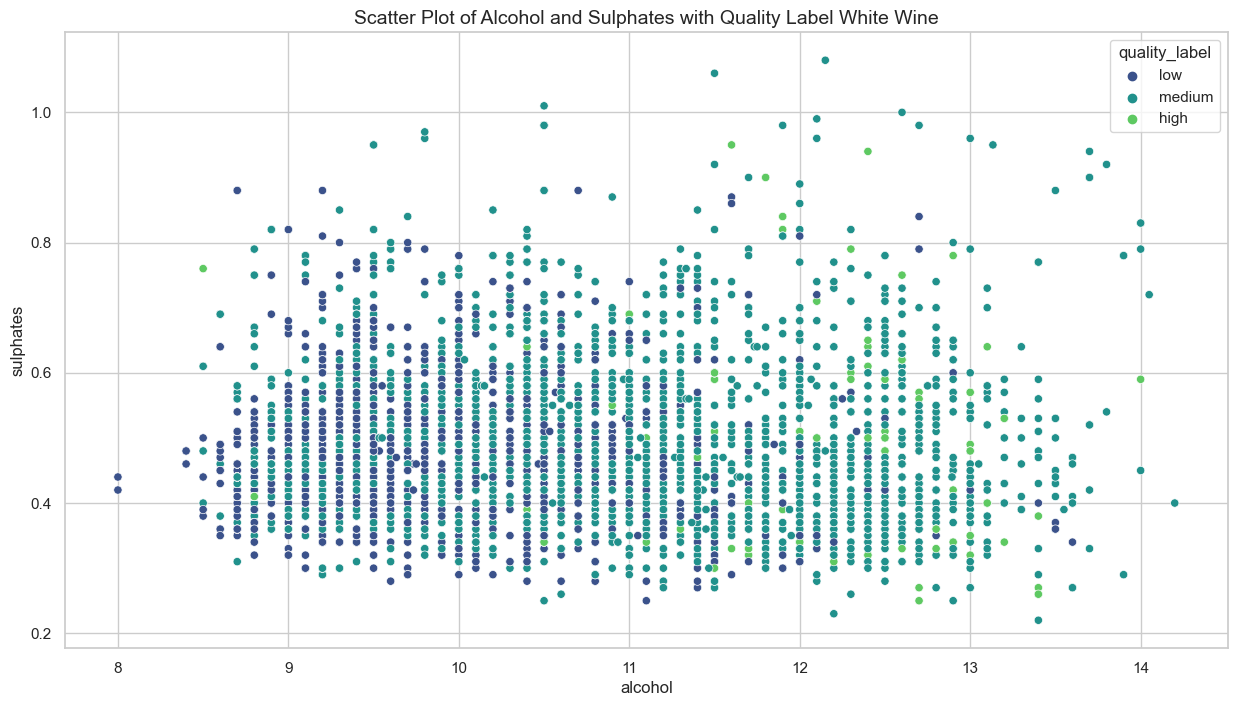

In [424]:
data=white_wine
# Select the variables to plot
x = data['alcohol']
y = data['sulphates']
hue = data['quality_label']
plt.title('Scatter Plot of Alcohol and Sulphates with Quality Label White Wine', fontsize=14)


# Create the scatter plot
sns.scatterplot(x=x, y=y, hue=hue, palette='viridis')

#If the scatter plot shows a clear linear pattern where the points tend to cluster around a straight line, it indicates a strong linear correlation between the variables. If the points are scattered randomly without any clear pattern, it indicates a weak or no correlation.

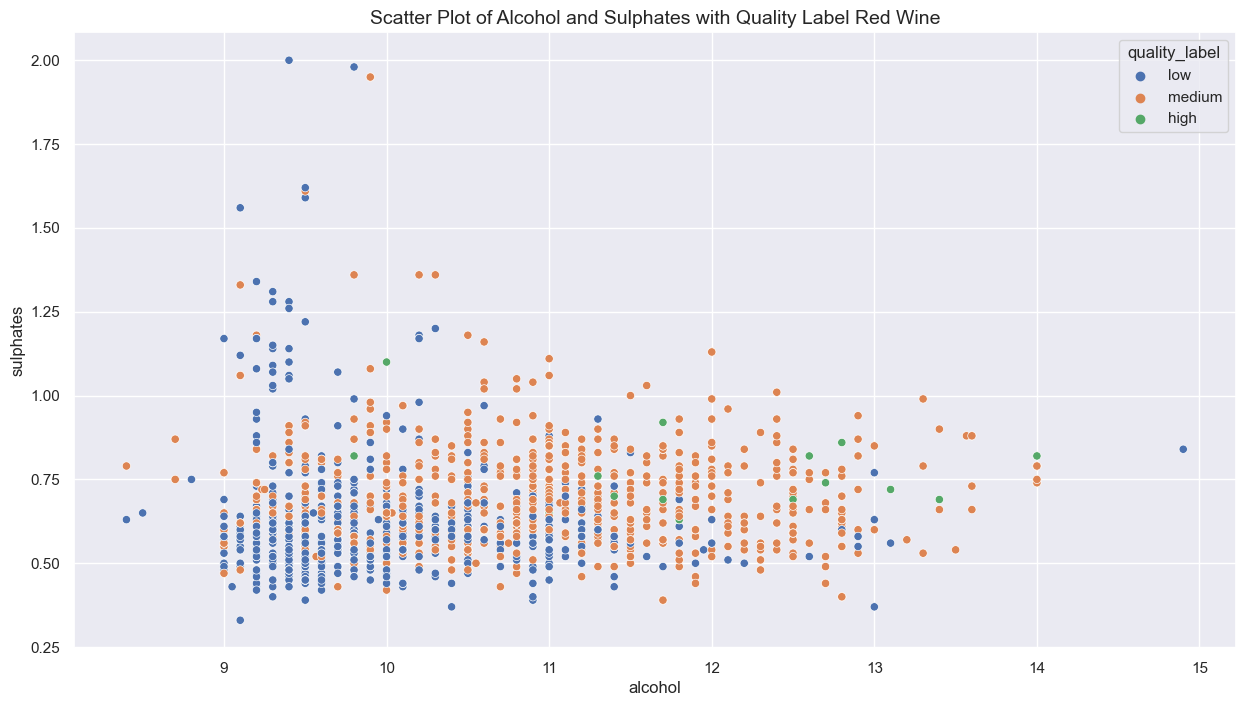

In [439]:
# Create the scatter plot 
sns.scatterplot(data=red_wine, x="alcohol", y="sulphates",hue="quality_label")
# Add Title
plt.title('Scatter Plot of Alcohol and Sulphates with Quality Label Red Wine', fontsize=14)

# Show the plot
plt.show()

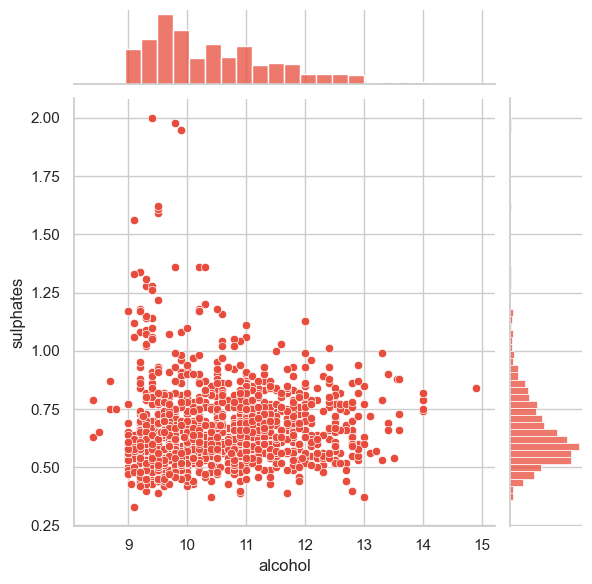

In [434]:

# Create the scatter plot with marginal histograms
sns.jointplot(data=red_wine, x="alcohol", y="sulphates")
sns.set(rc={'figure.figsize':(15,8)})

# Show the plot
plt.show()


#There appears to be a positive correlation between alcohol and sulphates. This means that as the alcohol content of the wine increases, the sulphates content tends to increase as well.

#The marginal histograms show the distribution of the alcohol and sulphates variables individually. The alcohol variable appears to be approximately normally distributed, while the sulphates variable is skewed to the right.

#The scatter plot shows that there are some outlier points where the sulphates content is very high relative to the alcohol content. These points are located in the upper right-hand corner of the plot.

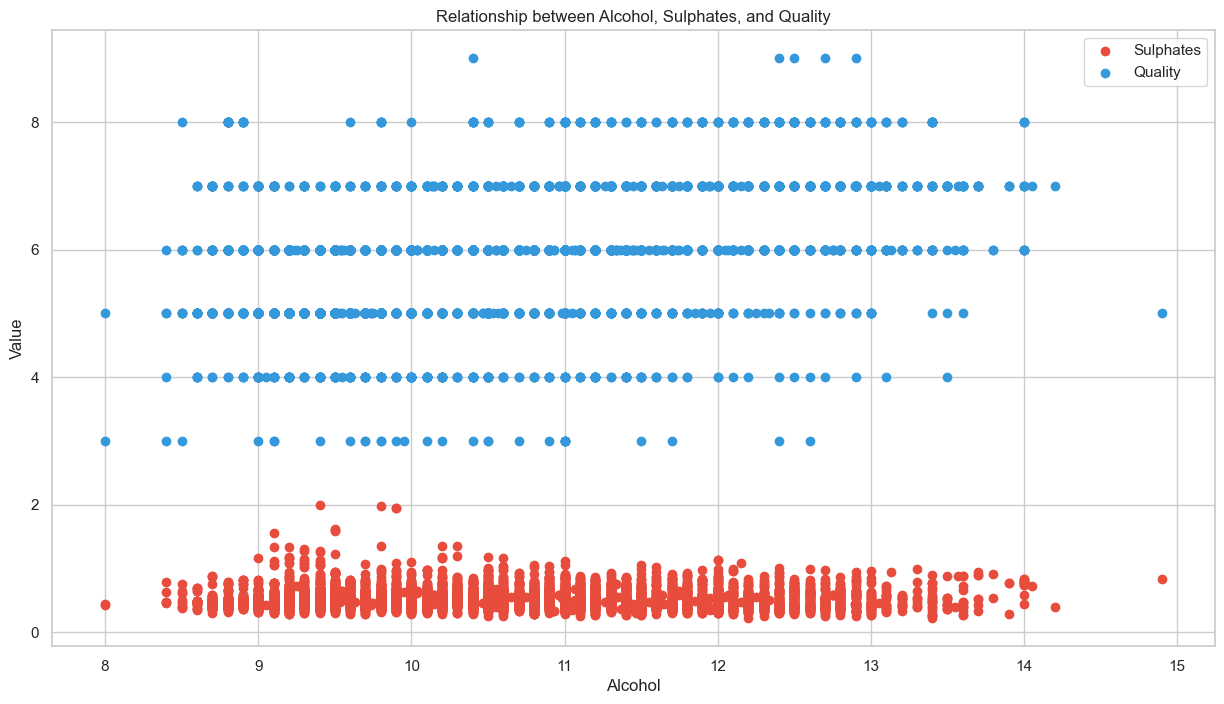

In [427]:

# Select the variables to plot
x = df_wine['alcohol']
y1 = df_wine['sulphates']
y2 = df_wine['quality']

# Create the scatter plot
fig, ax = plt.subplots()
ax.scatter(x, y1, label='Sulphates')
ax.scatter(x, y2, label='Quality')

# Set the axis labels and title
ax.set_xlabel('Alcohol')
ax.set_ylabel('Value')
ax.set_title('Relationship between Alcohol, Sulphates, and Quality')

# Add a legend
ax.legend()

# Show the plot
plt.show()


#Higher quality appears to correspond with higher alcohol and sulphites

<AxesSubplot:>

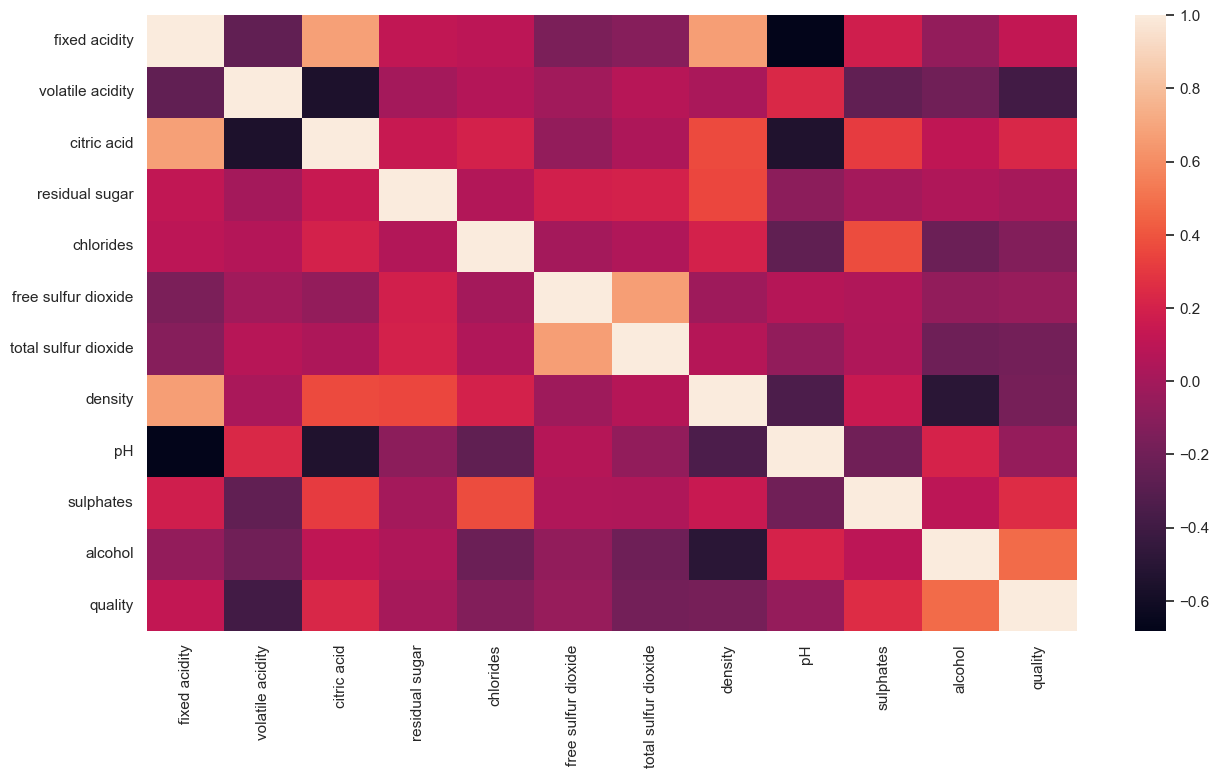

In [433]:
# Calculate the correlation matrix
corr = red_wine.corr()
# Create heatmap

sns.heatmap (corr)
# Add a title


Text(0.5, 1.0, 'Correlation Heatmap of White Wine Features')

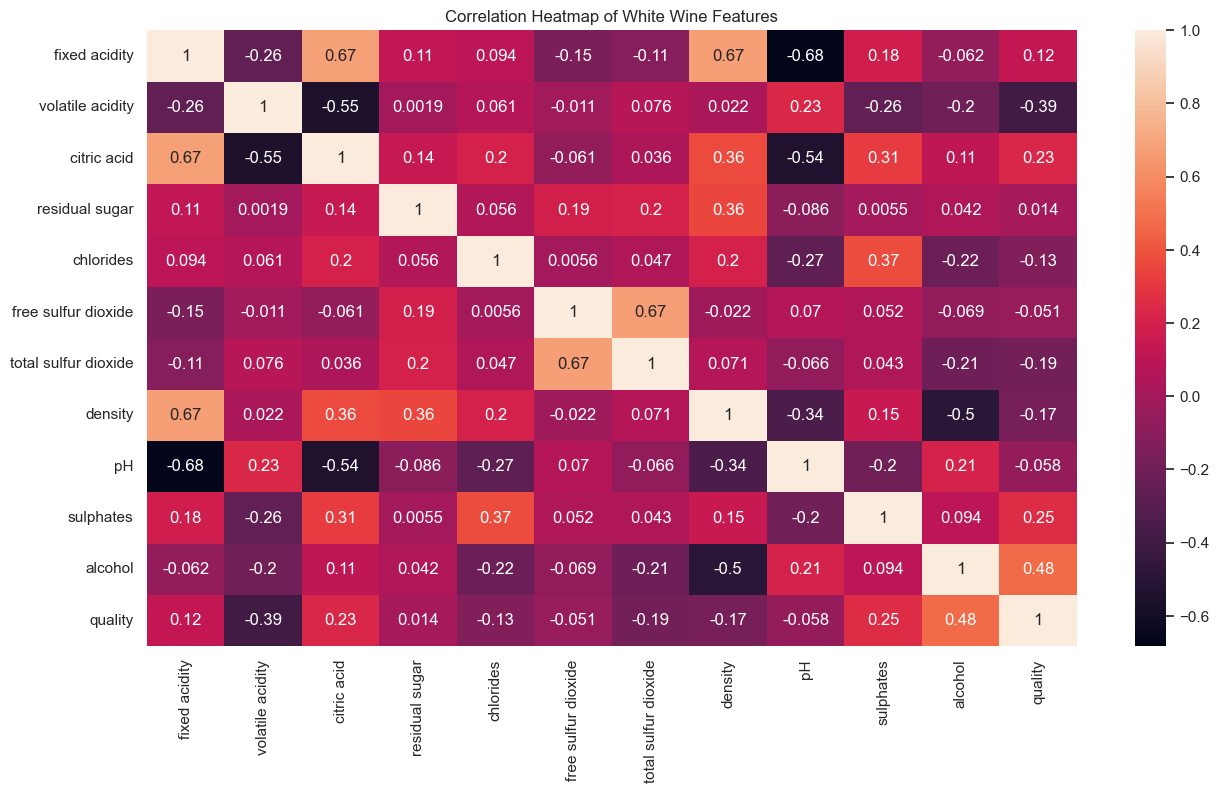

In [430]:
#If we set annot=True, we get values by which features are correlated to each other 

# Calculate the correlation matrix
corr = red_wine.corr()
# Create heatmap

sns.heatmap (corr, annot=True)
# Add a title
plt.title('Correlation Heatmap of White Wine Features')

Text(0.5, 1.0, 'Correlation Heatmap of White Wine Features')

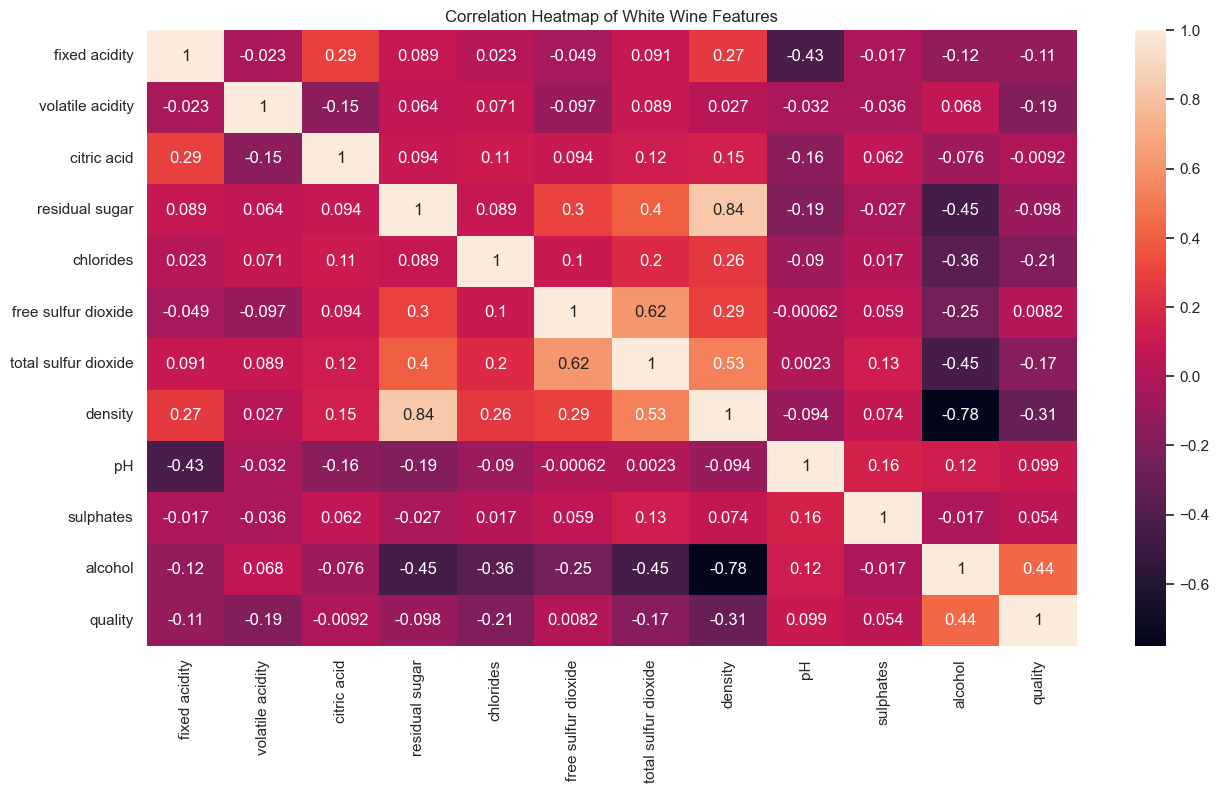

In [429]:

# Calculate the correlation matrix
corr = white_wine.corr()
# Create heatmap

sns.heatmap (corr, annot=True)
# Add a title
plt.title('Correlation Heatmap of White Wine Features')

#Positive Correlation is observed between Quality and Fixed Acidity

#Therefore, understanding the relationship between Fixed Acidity and Quality can help winemakers to optimize the acidity levels in their wine and improve its overall quality.

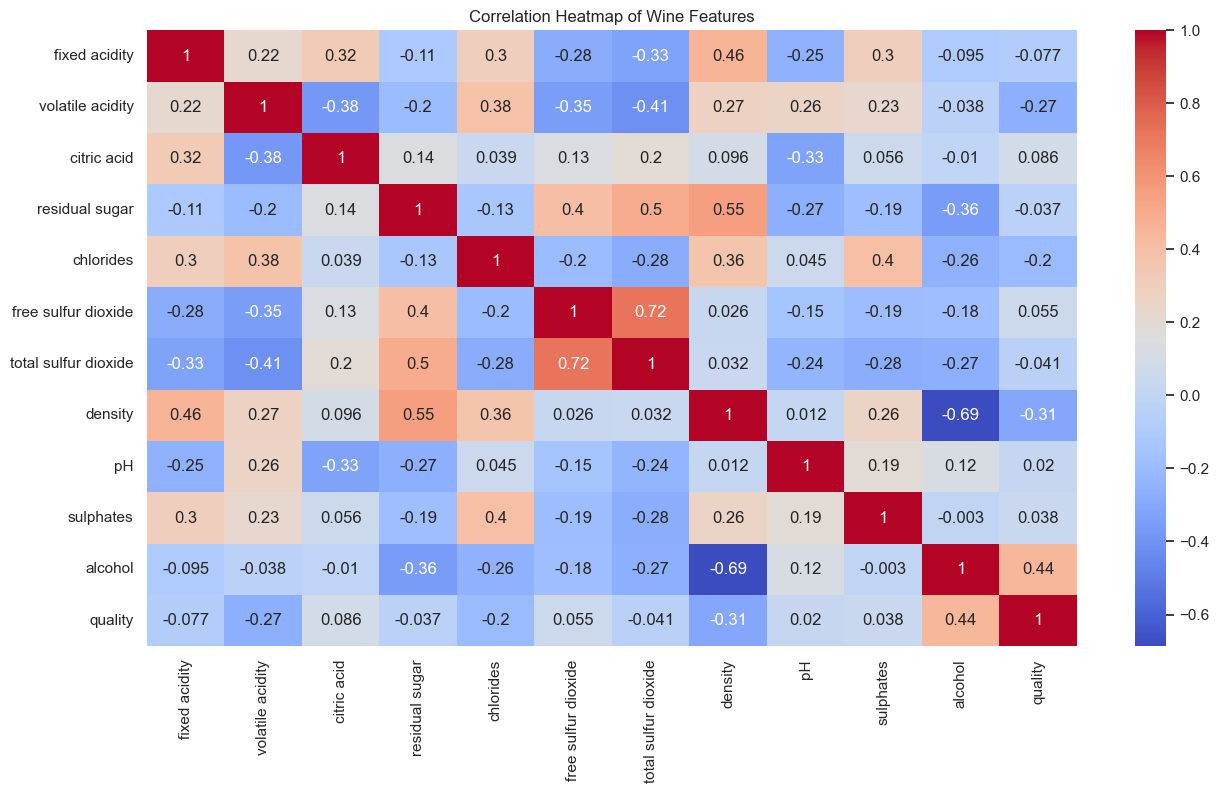

In [428]:


# Concatenate the datasets along the rows
wine = pd.concat([red_wine, white_wine], axis=0)

# Calculate the correlation matrix
corr = wine.corr()

# Create heatmap
sns.heatmap(corr, cmap='coolwarm', annot=True)

# Add a title
plt.title('Correlation Heatmap of Wine Features')

# Show the plot
plt.show()



This is to test git.